# PmagPy Command Line Version

by Lisa Tauxe, Lori Jonestrask, Nick Swanson-Hysell and Nick Jarboe

### What is **PmagPy**?  

**PmagPy** is a software package for analyzing paleomagnetic and rock magnetic data using Python. This notebook demonstrates the use of **PmagPy** command line scripts. This notebook demonstrates the use of **PmagPy** functions on the command line. For examples of how to use PmagPy scripts in a Python environment, see the static version of [**PmagPy.ipynb**](http://pmagpy.github.io/PmagPy.html), or you can open it locally the same way you opened this notebook.

### What are paleomagnetism and rock magnetism?  

For information on the science of paleomagnetism and rock magnetism, see textbook at: https://earthref.org/MagIC/books/Tauxe/Essentials/


### Customizing this notebook

If you want to make changes to this notebook, you should make a copy (see File menu).  Otherwise each time you update **PmagPy**, your changes will be overwritten.


### Get started
- This notebook  is meant to function from within the PmagPy-data directory and calls are relative to that (PmagPy directory for developers).   
- To specify a working directory, many programs have the command line argument -WD.  


- Run the code block below (click on the cell and then click 'Run'):





In [1]:
import os
import glob
from IPython.display import Image
import matplotlib as plt
from pmagpy import pmag
basemap_present, Basemap = pmag.import_basemap()
cartopy_present, cartopy = pmag.import_cartopy()
from pmag_env import set_env

# Help

You can get more details about any program on your command line or in a notebook.  There are many options available for each program, all of which are listed in each program's help message.  To call up the help message, you just need to use the command line argument `-h`.  See the examples below:

To get help within the notebook environment:

`! program_name.py -h`

To get help on the command line:

`program_name.py -h`

If you are running Windows, you may need to run:

`program_name -h`

Here's an example of calling up the help message for program **angle.py**:

In [2]:
!angle.py -h


    NAME
        angle.py

    DESCRIPTION
      calculates angle between two input directions D1,D2

    INPUT (COMMAND LINE ENTRY)
           D1_dec D1_inc D1_dec D2_inc
    OUTPUT
           angle

    SYNTAX
        angle.py [-h][-i] [command line options] [< filename]

    OPTIONS
        -h prints help and quits
        -i for interactive data entry
        -f FILE input filename
        -F FILE output filename (required if -F set)
        Standard I/O
    


## Guide to PmagPy

- the functions in this notebook are listed alphabetically so here is a handy guide by function:
- Calculations: 
    - [angle.py](#angle.py) : calculates the angle between two vectors
    - [apwp.py](#apwp.py) : returns predicted paleolatitudes, directions and pole latitude/longitude from apparent polar wander paths of Besse and Courtillot (2002).
    - [b_vdm.py](#b_vdm.py) : converts B (in microT) and (magnetic) latitude to V(A)DM (see [vdm_b.py](#vdm_b.py))
    - [bootams.py](#bootams.py) : calculates bootstrap statistics for tensor data
    - [cart_dir.py](#cart_dir.py) : converts cartesian coordinates (x,y,z) to declination, inclination, intensity (see [dir_cart.py](#dir_cart.py))
    - [di_eq.py](#di_eq.py) : maps declination, inclinatitions to X,Y for plotting in equal area projections
    - [di_geo.py](#di_geo.py) : rotates declination, inclination in specimen coordinates to geographic
    - [di_rot.py](#di_rot.py) : rotates directions to a  coordinate system with D,I as center
    - [di_tilt.py](#di_tilt.py) : rotates directions to stratigraphic coordinates
    - [di_vgp.py](#di_vgp.py) : converts direction to Virtual Geomagnetic Pole (see [vgp_di.py](#vgp_di.py))
    - [dia_vgp.py](#dia_vgp.py) : converts direction and $\alpha_{95}$ to Virtual Geomagnetic Pole and dp,dm
    - [dipole_pinc.py](#dipole_pinc.py) : calculates inclination given latitude assuming geocentric axial dipole
    - [dipole_plat.py](#dipole_plat.py) : calculates latitude given inclination assuming geocentric axial dipole
    - [dir_cart.py](#dir_cart.py) : converts declination, inclination, intensity to cartesian coordinates (see [cart_dir.py](#cart_dir.py))
    - [eigs_s.py](#eigs_s.py) : converts eigenparameters to equivalent 6 element tensor (see [s_eigs.py](#s_eigs.py))
    - [eq_di.py](#eq_di.py) : takes X,Y from equal area projection (e.g., from digitized coordinates) and  converts to declination, inclination
    - [fcalc.py](#fcalc.py) : returns the value from an F table, given the degrees of freedom.
    - [fisher.py](#fisher.py) : generates sets of directions drawn from Fisher distributions with vertical true mean
    - [fishrot.py](#fishrot.py) : generates sets of directions drawn from Fisher distributions with arbitrary true mean
    - [gaussian.py](#gaussian.py) : generates data drawn from a normal distribution
    - [gobing.py](#gobing.py) : calculates Bingham statistics from a set of directions
    - [gofish.py](#gofish.py) : calculates Fisher statistics from a set of directions
    - [gokent.py](#gokent.py) : calculates Kent statistics from a set of directions
    - [goprinc.py](#goprinc.py) : calculates principal directions statistics
    - [igrf.py](#igrf.py) : calculates geomagnetic field vectors for location, age given a field model (e.g., IGRF)
    - [incfish.py](#incfish.py) : estimates the true mean inclination from inclination only data
    - [pca.py](#pca.py) : calculates the best-fit line or plane for demagnetization data and associated statistics
    - [pt_rot.py](#pt_rot.py) : rotates point given finite rotation pole
    - [scalc.py](#scalc.py) : calculates  VGP scatter
    - [s_eigs.py](#s_eigs.py) : takes a 6 element tensor and calculates eigen parameters (see [eigs_s.py](#eigs_s.py))
    - [s_geo.py](#s_geo.py) : rotates 6 element tensors to geographic coordinates
    - [s_hext.py](#s_hext.py) : calculates Hext statistics from 6 element tensors
    - [s_tilt.py](#s_tilt.py) : rotates 6 element tensors to stratigraphic coordinates
    - [squish.py](#squish.py): flattens inclination data given flattening factor (see [unsquish.py](#unsquish.py))
    - [sundec.py](#sundec.py) : calulates direction to sun for location, date, time and sun azimuth
    - [tk03.py](#tk03.py) : generates sets of directions consistent with the TK03 field model
    - [uniform.py](#uniform.py) : generates sets of uniformly distributed directions
    - [unsquish.py](#unsquish.py) : unsquishes flattened inclinations, given flattening factor (see [squish.py](#squish.py))
    - [vector_mean](#vector_mean) : calculates vector mean for sets of vectors (declination, inclination, intensity)
    - [vdm_b.py](#vdm_b.py) : calculates intensity at given location from specified virtual dipole moment (see [b_vdm.py](#b_vdm.py))
    - [vgp_di.py](#vgp_di.py) : calculates direction at given location from virtual geomagnetic pole (see [di_vgp.py](#di_vgp.py))
    - [watsons_f.py](#watsons_f.py) : calculates Watson's F statistic for testing for common mean
    
- Plots:
    - [ani_depthplot.py](#ani_depthplot.py) : plots anisotropy data against depth in stratigraphic section (Xmas tree plots)
    - [aniso_magic.py](#aniso_magic.py) : makes plots of anisotropy data and bootstrapped confidences 
    - [biplot_magic.py](#biplot_magic.py) : plots different columns against each other in MagIC formatted data files
    - [chi_magic.py](#chi_magic.py) : plots magnetic susceptibility data in MagIC format as function of field, frequency or temperature
    - [common_mean.py](#common_mean.py) : graphical approach to testing two sets of directions for common mean using bootstrap
    - [core_depthplot.py](#core_depthplot.py) : plots MagIC formatted data 
    - [curie.py](#curie.py) : makes plots of Curie Temperature data and provides estimates for Tc
    - [dayplot_magic.py](#dayplot_magic.py) : makes Day et al. (1977) and other plots with hysteresis statistics
    - [dmag_magic.py](#dmag_magic.py) : plots remanence against demagnetization step for MagIC formatted files
    - [eqarea.py](#eqarea.py) and [eqarea_magic.py](#eqarea_magic.py) : makes equal area projections for directions
    - [eqarea_ell.py](#eqarea_ell.py) : makes equal area projections for directions with specified confidence ellipses
    - [find_ei.py](#find_ei.py) : finds the inclination unflattening factor that unsquishes directions to match TK03 distribution
    - [fishqq.py](#fishqq.py): makes a Quantile-Quantile plot for directions against uniform and exponential distributions
    - [foldtest.py](#foldtest.py) & [foldtest_magic.py](#foldtest_magic.py) : finds  tilt correction that maximizes concentration of directions, with bootstrap confidence bounds.          
    - [forc_diagram.py](#forc_diagram.py): plots FORC diagrams for both conventional and irregular FORCs
    - [hysteresis_magic.py](#hysteresis_magic.py) : makes plots of hysteresis data (not FORCs). 
    - [irm_unmix.py](#irm_unmix.py) : analyzes IRM acquisition data in terms of coercivity distributions
    - [irmaq_magic.py](#irm_magic.py) : plots IRM acquistion data
    - [lnp_magic.py](#lnp_magic.py) : plots lines and planes for site level data and calculates best fit mean and alpha_95
    - [lowes.py](#lowes.py) : makes a plot of the Lowe's spectrum for a geomagnetic field model
    - [lowrie.py](#lowrie.py) and [lowrie_magic.py](#lowrie_magic.py) : makes plots of Lowrie's (1990) 3D-IRM demagnetization experiments
    - [plot_cdf.py](#plot_cdf.py) : makes a cumulative distribution plot of data
    - [plotdi_a.py](#plotdi_a.py) : makes equal are plots of directions and their $\alpha_{95}$s
    - [plot_geomagia.py](#plot_geomagia.py) : makes plots from files downloaded from the  geomagia website
    - [plot_magic_keys.py](#plot_magic_keys.py) : plots data from MagIC formatted data files
    - [qqplot.py](#qqplot.py) : makes a Quantile-Quantile plot for data against a normal distribution
    - [qqunf.py](#qqunf.py) : makes a Quantile-Quantile plot for data against a uniform distribution
    - [revtest.py](#revtest.py) & [revtest_magic.py](#revtest_magic.py) : performs a bootstrap reversals test
    - [thellier_magic.py](#thellier_magic.py) : makes plots of thellier-thellier data. 
    - [watsons_v.py](#watsons_v.py) : makes a graph for Watson's V test for common mean
    - [zeq.py](#zeq.py) and [zeq_magic.py](#zeq_magic.py) : makes quicky zijderveld plots for measurement data

- Maps: 
    - [cont_rot.py](#cont_rot.py) : makes plots of continents after rotation to specified coordinate system
    - [plot_magmap.py](#plot_magmap.py) : makes a color contour plot of geomagnetic field models
    - [plot_map_pts.py](#plot_map_pts.py) : plots points on maps
    - [polemap_magic.py](#polemap_magic.py) : reads in MagIC formatted file with paleomagnetic poles and plots them
    - [vgpmap_magic.py](#vgpmap_magic.py) : reads in MagIC formatted file with virtual geomagnetic poles and plots them
   
- Working with MagIC:
    - [combine_magic.py](#combine_magic.py) : combines two MagIC formatted files of same type
    - [grab_magic_key.py](#grab_magic_key.py) : prints out a single column from a MagIC format file
    - [magic_select.py](#magic_select.py) : selects data from MagIC format file given conditions (e.g., method_codes contain string)
    - [download_magic.py](#download_magic.py) : unpacks a contribution text file downloaded from the MagIC website
    - [upload_magic.py](#upload_magic.py) : prepares a directory with a MagIC contribution for uploading to MagIC
    - [Conversion scripts](#Conversion-Scripts) : convert many laboratory measurement formats to the MagIC data model 3 format
        - [\_2g_bin_magic.py](#_2g_bin_magic.py) : converts 2G binary files to MagIC
        - [aarm_magic.py](#aarm_magic.py) : takes a MagIC formated _measurements.txt_ file with anisotropy of ARM data and calculates the tensors and stores in a MagIC formatted _specimens.txt_ file.
        - [atrm_magic.py](#atrm_magic.py) : takes a MagIC formated _measurements.txt_ file with anisotropy of TRM data and calculates the tensors and stores in a MagIC formatted _specimens.txt_ file.
        - [agm_magic.py](#agm_magic.py) : converts Princeton Measurements alternating gradient force magnetization (AGM) files to MagIC.
        - [bgc_magic.py](#bgc_magic.py) : convert Berkeley Geochronology Center files to MagIC. 
        - [cit_magic.py](#cit_magic.py) : convert Cal Tech format files to MagIC.
        - [generic_magic.py](#generic_magic.py) : converts generic files to MagIC. 
        - [huji_magic.py](#huji_magic.py) : converts Hebrew University, Jerusalem, Israel files to MagIC.
        - [huji_sample_magic.py](#huji_sample_magic.py) : converts HUJI files to a MagIC format. 
        - [jr6_jr6_magic.py](#jr6_jr6_magic.py) : converts the AGICO JR6 spinner .jr6 files to MagIC 
        - [jr6_txt_magic.py](#jr6_txt_magic.py) : converts the AGICO JR6 .txt files to MagIC
        - [k15_magic.py](#k15_magic.py) : converts 15 measurement anisotropy of magnetic susceptibility files to MagIC. 
        - [ldeo_magic.py](#ldeo_magic.py) : converts Lamont-Doherty files to MagIC.  
        - [livdb_magic.py](#livdb_magic.py) : converts Liverpool files to MagIC.  
        - [mst_magic.py](#mst_magic.py) : converts Curie Temperature experimental data to MagIC
        - [sio_magic.py](#sio_magic.py) : converts Scripps Institution of Oceanography data files to MagIC 
        - [sufar4_magic.py](#sufar4_magic.py) : converts AGICO SUFAR program (ver.1.2.) ascii files to MagIC
        - [tdt_magic.py](#tdt_magic.py) : converts Thellier Tool files to MagIC
        - [utrecht_magic.py](#utrecht_magic.py) : converts Fort Hoofddijk, Utrecht University Robot files to MagIC
        - [orientation_magic.py](#orientation_magic.py) : converts an "orient.txt" formatted file with field notebook information into MagIC formatted files
        - [azdip_magic.py](#azdip_magic.py) : converts an "azdip" formatted file to a samples.txt file format
- other handy scripts
    - [chartmaker.py](#chartmaker.py) : script for making chart to guide IZZI lab experiment

## \_2g_bin_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#combine_magic)

In [3]:
!_2g_bin_magic.py -f data_files/convert_2_magic/2G_bin_magic/mn1/mn001-1a.dat 

importing  mn001-1a
-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- writing measurements records to /Users/nebula/Python/PmagPy/measurements.txt
-I- 19 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/specimens.txt
-I- 1 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/samples.txt
-I- 1 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 19 records written to measurements file


## aarm_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#aarm_magic)

In [4]:
if os.path.exists('data_files/aarm_magic/specimens.txt'):
    os.remove('data_files/aarm_magic/specimens.txt')
!sio_magic.py -f data_files/aarm_magic/arm_magic_example.dat -loc Bushveld -LP AF:ANI \
    -ncn 3 ac 180 -dc 50 -1 -1 -F data_files/aarm_magic/measurements.txt
!aarm_magic.py -DM 3 -WD data_files/aarm_magic/ -f measurements.txt
!cat data_files/aarm_magic/specimens.txt | head

-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 126 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 7 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 7 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/aarm_magic/measurements.txt
-I- 126 records written to measurements file
7  records written to file  /Users/nebula/Python/PmagPy/data_files/aarm_magic/specimens.txt
specimen data stored in /Users/nebula/Python/PmagPy/data_files/aarm_magic/specimens.txt
tab 	specimens
aniso_ftest	aniso_ftest12	aniso_ftest23	aniso_s	aniso_s_mean	aniso

## agm_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#agm_magic)

In [6]:
# note: example data files are in old format
!agm_magic.py -spn myspec --usr ‘‘Lima Tango‘‘ -f data_files/convert_2_magic/agm_magic/agm_magic_example.agm -u cgs -old

-I- Using online data model
-I- Using online data model
-I- writing specimens records to /Users/nebula/Python/PmagPy/myspec_specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/myspec_locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/myspec.magic
-I- 284 records written to measurements file


## angle.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#angle)

In [7]:
!angle.py -f data_files/angle/angle.dat

   75.9
  119.1
  103.7
   81.4
  120.1
  100.9
   95.1
   74.1
   78.4
  120.1
  114.4
   66.3
   85.4
   95.1
   93.8
   93.1
  105.4
   71.8
  104.0
   93.8
   93.3
   96.3
   90.1
  112.2
   90.1
  120.0
   75.3
   86.2
   85.9
   82.6
  115.5
   99.3
   65.9
   90.6
   90.5
   84.5
   93.0
   67.5
   76.8
   83.8
  128.3
   91.7
   46.9
  110.7
  103.7
   64.4
   81.9
   94.0
  121.2
   83.6
  113.7
   76.4
  113.4
   74.1
   79.4
   74.9
   90.6
   91.4
  112.7
   77.3
   77.1
   62.4
   88.4
  106.3
  100.6
  143.8
  104.9
   91.8
   96.2
   85.6
   65.6
   88.6
   75.6
   93.4
  101.3
  115.1
   86.7
   92.3
   91.9
  102.4
   78.9
   93.4
   88.1
   94.5
   77.0
  110.4
   89.2
   80.9
  100.4
   91.9
  107.1
  115.8
  111.3
  124.6
   88.1
   66.9
   99.9
   76.7
   71.4
  100.8


## ani_depthplot.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#ani_depthplot)

Using default arguments for: -f, -F, -A, -ID, -Fsa, -Fsi, -fb, -fsa, -fa, -fsum, -ds, -d, -fsp
-I- Using online data model
Saved file: U1361A_ani_depthplot.png


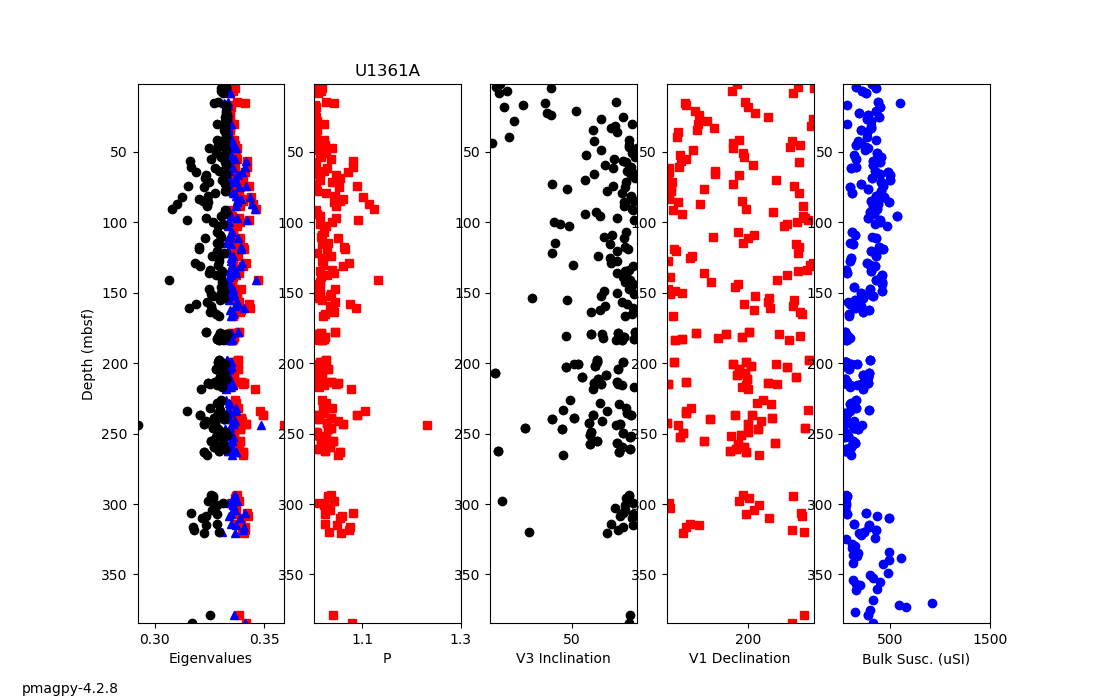

In [9]:
# OSX users with pip install should use:
# !ani_depthplot_anaconda -DM 3 -WD data_files/ani_depthplot -sav -fmt png

!ani_depthplot.py -DM 3 -WD data_files/ani_depthplot -sav -fmt png
Image('U1361A_ani_depthplot.png')

## aniso_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#aniso_magic)

In [10]:
!aniso_magic.py -WD data_files/aniso_magic -crd s -f sed_specimens.txt -sav -fmt png -v -d 3 0 90 -n 300

-I- Using online data model
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
Doing bootstrap - be patient
1  saved in  _g_aniso-data.png
2  saved in  _g_aniso-conf.png
3  saved in  _g_aniso-tcdf.png
4  saved in  _g_aniso-vxcdf.png
5  saved in  _g_aniso-vycdf.png
6  saved in  _g_aniso-vzcdf.png


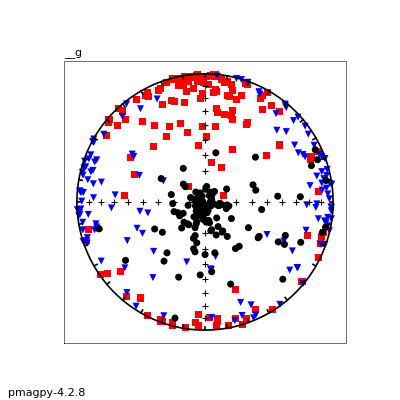

In [11]:
Image("_g_aniso-data.png")

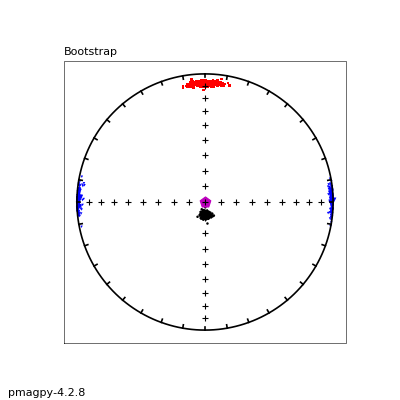

In [12]:
Image("_g_aniso-conf.png")

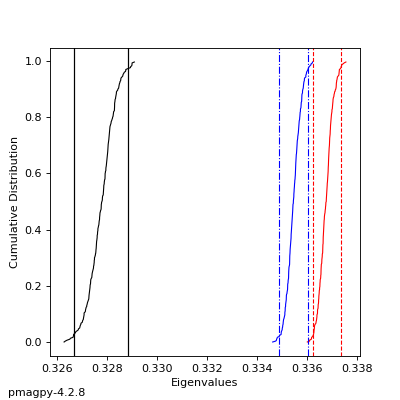

In [13]:
Image("_g_aniso-tcdf.png")

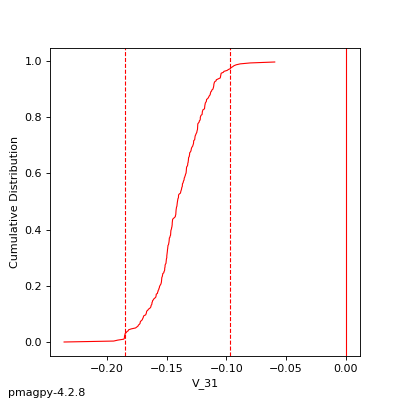

In [14]:
Image("_g_aniso-vxcdf.png")

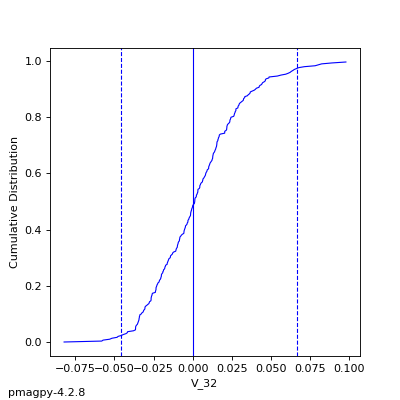

In [15]:
Image("_g_aniso-vycdf.png")

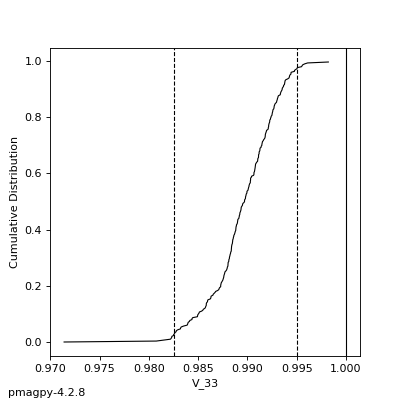

In [16]:
Image("_g_aniso-vzcdf.png")

## apwp.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#apwp)

In [21]:
!apwp.py -f data_files/apwp/apwp_example.dat

   100.0    38.8   352.4    58.1    81.5   198.3



## atrm_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#atrm_magic)

In [22]:
if os.path.exists('data_files/atrm_magic/specimens.txt'):
    os.remove('data_files/atrm_magic/specimens.txt')
!atrm_magic.py -WD data_files/atrm_magic -f atrm_measurements3.txt
!cat data_files/atrm_magic/specimens.txt | head

-W- /Users/nebula/Python/PmagPy/data_files/atrm_magic/specimens.txt is not a valid specimens file 
30  records written to file  /Users/nebula/Python/PmagPy/data_files/atrm_magic/specimens.txt
specimen data stored in /Users/nebula/Python/PmagPy/data_files/atrm_magic/specimens.txt
tab 	specimens
aniso_ftest	aniso_ftest12	aniso_ftest23	aniso_s	aniso_s_mean	aniso_s_n_measurements	aniso_s_sigma	aniso_s_unit	aniso_tilt_correction	aniso_type	aniso_v1	aniso_v2	aniso_v3	description	experiments	method_codes	sample	specimen
15.8	2.8	19.5	0.320620 : 0.340852 : 0.338528 : 0.010075 : -0.002932 : 0.027117	1.948e-08	6	0.006994	Am^2	-1	ATRM	0.358892  :    19.3  :    50.4	0.342419  :   266.5  :    17.8	0.298689  :   163.9  :    34.0	Critical F: 3.1059;Critical F12/F13: 3.8853	ak01a:ATRM	LP-AN-TRM:AE-H	ak01a	ak01a
1.8	0.2	2.5	0.351180 : 0.343893 : 0.304926 : 0.001119 : -0.000509 : -0.012140	7.400e-09	6	0.018660	Am^2	-1	ATRM	0.354313  :   186.8  :    13.8	0.343755  :    96.5  :     1.3	0.301933  :     1.3

## azdip_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#azdip_magic)

In [24]:
# MagIC 3
!azdip_magic.py -f data_files/azdip_magic/azdip_magic_example.dat -ncn 1\
   -mcd FS-FD:SO-POM -loc "Northern Iceland" -DM 3 -WD data_files/azdip_magic
        
!cat data_files/azdip_magic/samples.txt | head

Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -app
916  records written to file  /Users/nebula/Python/PmagPy/data_files/azdip_magic/samples.txt
Data saved in  /Users/nebula/Python/PmagPy/data_files/azdip_magic/samples.txt
tab 	samples
azimuth	bed_dip	bed_dip_direction	citations	dip	location	method_codes	sample	site	software_packages
183.0	5.0	59.0	This study	76.0	Northern Iceland	FS-FD:SO-POM	is001a	is001	pmagpy-4.2.8
207.0	5.0	59.0	This study	80.0	Northern Iceland	FS-FD:SO-POM	is001b	is001	pmagpy-4.2.8
192.0	5.0	59.0	This study	59.0	Northern Iceland	FS-FD:SO-POM	is001c	is001	pmagpy-4.2.8
276.0	5.0	59.0	This study	79.0	Northern Iceland	FS-FD:SO-POM	is001d	is001	pmagpy-4.2.8
198.0	5.0	59.0	This study	34.0	Northern Iceland	FS-FD:SO-POM	is001e	is001	pmagpy-4.2.8
203.0	5.0	59.0	This study	64.0	Northern Iceland	FS-FD:SO-POM	is001f	is001	pmagpy-4.2.8
230.0	5.0	59.0	This study	48.0	Northern Iceland	FS-FD:SO-POM	is001g	is001	pmagpy-4.2.8
310.0	5.0	59.0	This study	56.0	Northern Iceland	

## bgc_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#bgc_magic)

In [26]:
!bgc_magic.py -f data_files/convert_2_magic/BGC_magic/15HHA1-2A

mag_file in bgc_magic ./data_files/convert_2_magic/BGC_magic/15HHA1-2A
-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 21 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 21 records written to measurements file


## b_vdm.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#b_vdm)

In [27]:
!b_vdm.py -f data_files/b_vdm/b_vdm_example.dat

 7.159e+22


## bootams.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#bootams)

In [28]:
!bootams.py -par   -f data_files/bootams/bootams_example.dat -n 300

Doing bootstrap - be patient

tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc

0.33505 0.00021     5.3    14.7    11.3   266.8    29.7    28.9   122.6    54.9
0.33334 0.00023   124.5    61.7    18.8   243.9    14.3    25.2   340.0    22.8
0.33161 0.00025   268.8    23.6    10.3     8.7    21.3    20.0   136.5    57.5


In [29]:
!bootams.py  -f data_files/bootams/bootams_example.dat -n 300

Doing bootstrap - be patient

tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc

0.33505 0.00022     5.3    14.7    10.2   260.9    39.0    14.0   111.9    46.6
0.33334 0.00020   124.5    61.7     5.7   226.1     6.5    17.6   319.6    28.7
0.33161 0.00015   268.8    23.6    10.8     1.2    10.5    12.3   113.0    63.4


## cart_dir.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#cart_dir)

In [30]:
!cart_dir.py -f data_files/cart_dir/cart_dir_example.dat

  340.0    65.0  1.000e+00
  176.0   -55.0  1.000e+00


## chartmaker.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#chartmaker)

You can't do chartmaker from within the notebook.  And chi_magic.py is still a bit buggy (problem with legend and 4th plot still shows up.)

## chi_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#chi_magic)

In [31]:
!chi_magic.py -f data_files/chi_magic/measurements.txt -fmt png -sav

Not enough data to plot IRM-Kappa-2352
1  saved in  IRM-OldBlue-1892_temperature.png
2  saved in  IRM-OldBlue-1892_frequency.png


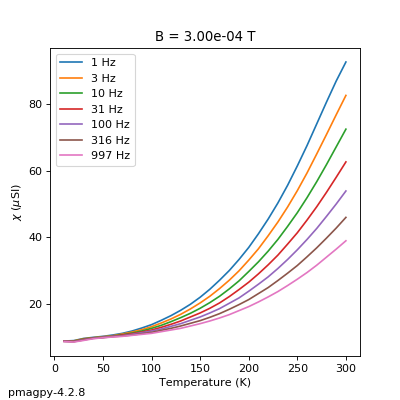

In [32]:
Image('IRM-OldBlue-1892_temperature.png')

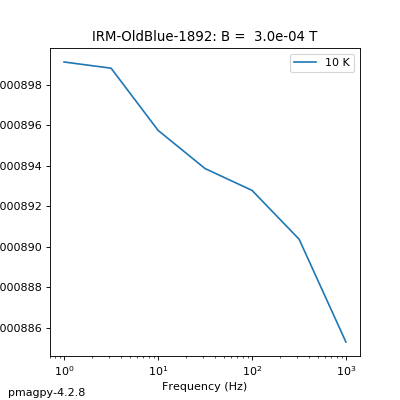

In [35]:
Image(filename='IRM-OldBlue-1892_3.png')

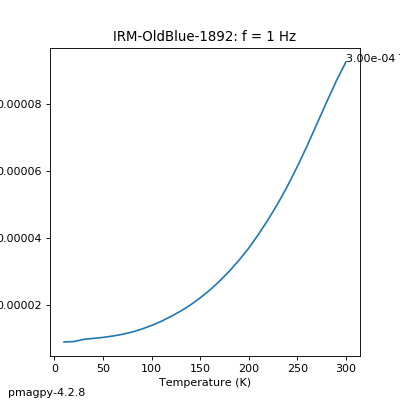

In [36]:
Image(filename='IRM-OldBlue-1892_2.png')

## cit_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#cit_magic)

In [37]:
!cit_magic.py  -f data_files/convert_2_magic/cit_magic/PI47/PI47-.sam -loc "Slate Islands" \
    -spc 1 -ncn 2 -mcd "FS-FD:SO-MAG" -A 

PI47-

-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 266 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 9 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 9 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 266 records written to measurements file


## combine_magic.py

 MagIC tables have many columns only some of which are used in a particular instance. So combining files of the same type must be done carefully to ensure that the right data come under the right headings. The program combine_magic.py can be used to combine any number of MagIC files from a given type.

[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#combine_magic)

In [38]:
!combine_magic.py -WD data_files/combine_magic -F measurements.txt -f af_measurements.txt therm_measurements.txt 

Using default arguments for: -A, -ID, -Fsa, -Fsi, -dm
-I- Using online data model
-I- Using online data model
-I- overwriting /Users/nebula/Python/PmagPy/data_files/combine_magic/measurements.txt
-I- 58 records written to measurements file


## common_mean.py


In [39]:
!common_mean.py -f data_files/common_mean/common_mean_ex_file1.dat\
   -f2 data_files/common_mean/common_mean_ex_file2.dat -sav -fmt png

Doing first set of directions, please be patient..
Doing second  set of directions, please be patient..
1  saved in  CD_X.png
2  saved in  CD_Y.png
3  saved in  CD_Z.png


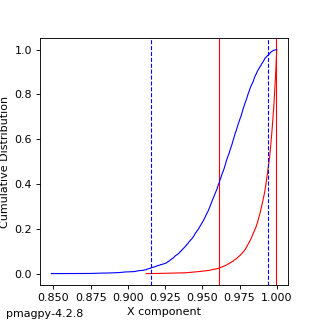

In [40]:
Image(filename='CD_X.png')

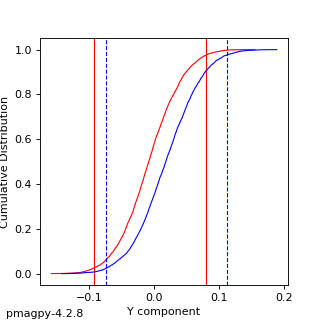

In [41]:
Image(filename='CD_Y.png')

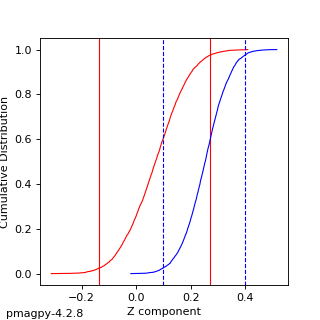

In [42]:
Image(filename='CD_Z.png')

## cont_rot.py

please see [\[notebook version\]](http://pmagpy.github.io/PmagPy.html#cont_rot)

## core_depthplot.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#core_depthplot)

In [45]:
# OSX users with pip install should use:

#!core_depthplot_anaconda -DM 3 -fsa ./data_files/core_depthplot/samples.txt -LP AF 15 \
#    -f ./data_files/core_depthplot/measurements.txt -log \
#    -d 50 150 -ts gts12 23 34 -D -fmt png -sav -DM 3 -ID ./data_files/core_depthplot

try:
    os.remove('DSDP Site 522_m__LT-AF-Z_core-depthplot.png')
except FileNotFoundError:
    pass
!core_depthplot.py -DM 3 -fsa ./data_files/core_depthplot/samples.txt -LP AF 15 \
    -f ./data_files/core_depthplot/measurements.txt -log \
    -d 50 150 -ts gts12 23 34 -D -fmt png -sav -DM 3 -ID ./data_files/core_depthplot

Using default arguments for: -F, -A, -WD, -Fsa, -Fsi, -fsum, -fwig, -fa, -fsp, -fres, -n, -L, -S, -I, -M, -ds, -sym
-I- Using online data model
-W- Column 'composite_depth' isn't in sites table, skipping it
9328  measurements read in from  /Users/nebula/Python/PmagPy/data_files/core_depthplot/measurements.txt
using intensity key: magn_mass
2332 depths found
-I- Created plot: DSDP Site 522_m__LT-AF-Z_core-depthplot.png


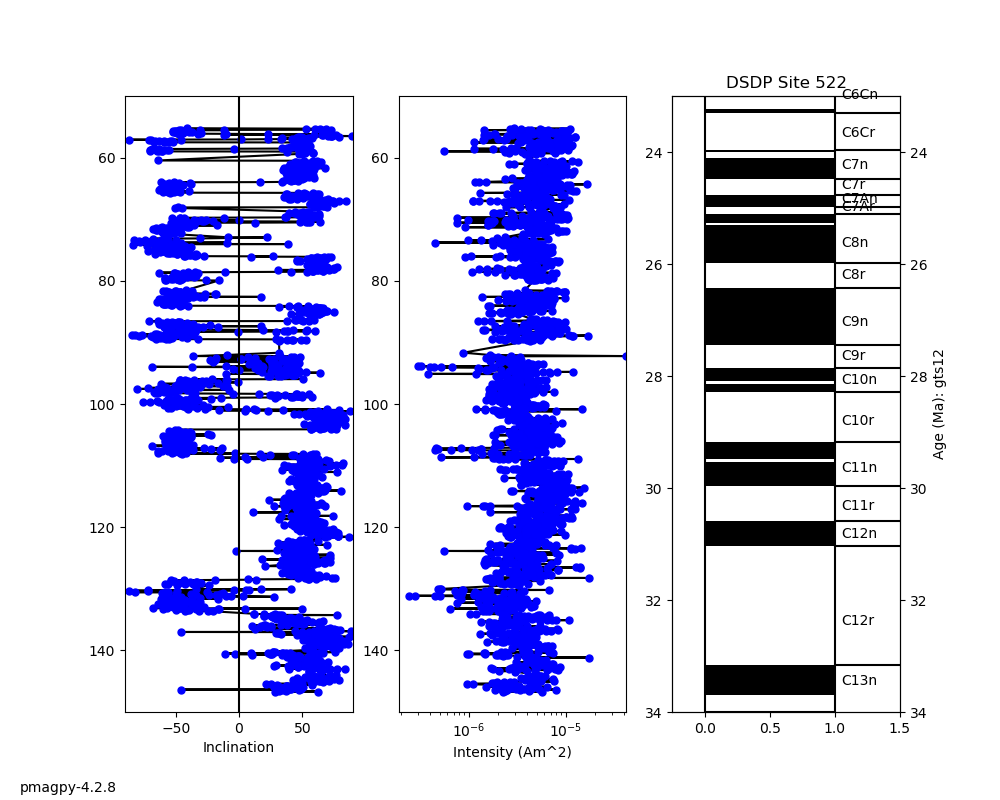

In [46]:
Image('DSDP Site 522_m__LT-AF-Z_core-depthplot.png')

In [47]:
# OSX users with pip install should use:
#!core_depthplot_anaconda -DM 3 -fa ./data_files/core_depthplot/ages.txt -LP AF 15 \
#    -f ./data_files/core_depthplot/measurements.txt -log \
#     -ts gts12 23 34 -D -fmt png -sav -DM 3 -ID ./data_files/core_depthplot

try:
    os.remove('DSDP Site 522_m__LT-AF-Z_core-depthplot.png')
except FileNotFoundError:
    pass
!core_depthplot.py -DM 3 -fa ./data_files/core_depthplot/ages.txt -LP AF 15 \
    -f ./data_files/core_depthplot/measurements.txt -log \
     -ts gts12 23 34 -D -fmt png -sav -DM 3 -ID ./data_files/core_depthplot

Using default arguments for: -F, -A, -WD, -Fsa, -Fsi, -fsum, -fwig, -fsa, -fsp, -fres, -n, -d, -L, -S, -I, -M, -ds, -sym
-I- Using online data model
-W- Column 'composite_depth' isn't in sites table, skipping it
-I- Adding age_high and age_low to locations table based on minimum/maximum ages found in sites table
9328  measurements read in from  /Users/nebula/Python/PmagPy/data_files/core_depthplot/measurements.txt
using intensity key: magn_mass
2332 depths found
-I- Created plot: DSDP Site 522_m__LT-AF-Z_core-depthplot.png


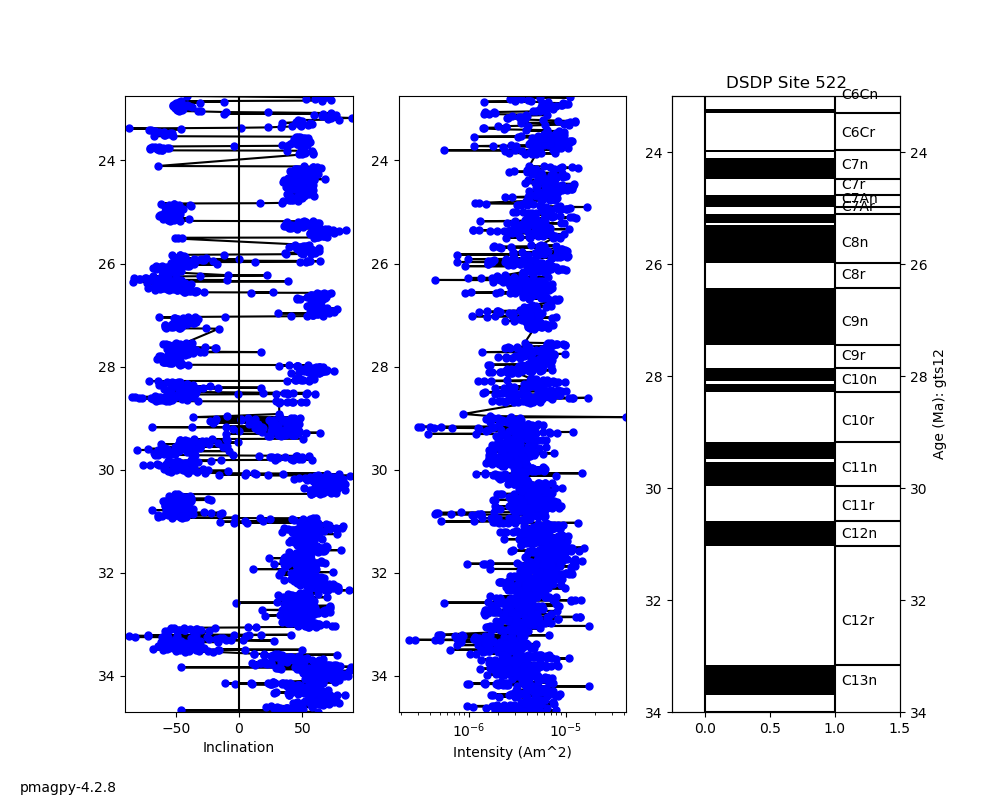

In [48]:
Image('DSDP Site 522_m__LT-AF-Z_core-depthplot.png')

## curie.py 
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#curie)

In [49]:
!curie.py -f data_files/curie/curie_example.dat -w 10 -fmt png -sav

second derivative maximum is at T=552
1  saved in  M_T.png
2  saved in  der1.png
3  saved in  der2.png
4  saved in  Curie.png


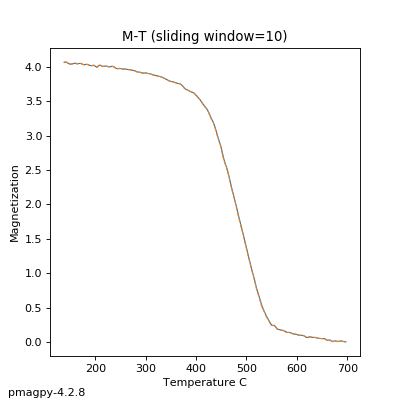

In [50]:
Image(filename='M_T.png')

## dayplot_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#dayplot_magic)

In [51]:
!dayplot_magic.py -WD data_files/dayplot_magic -f specimens.txt -sav -fmt png

-I- Using online data model
1  saved in  _day.png
2  saved in  _S-Bc.png
3  saved in  _S-Bcr.png


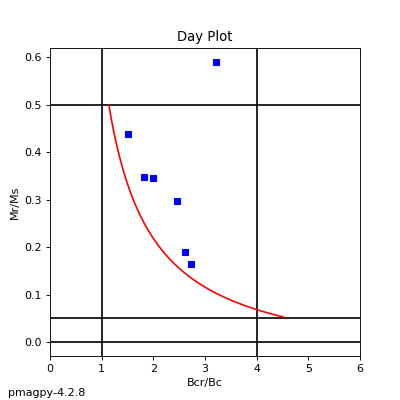

In [52]:
Image("_day.png")

## demag_gui.py

Use demag_gui.py from the command line or from within pmag_gui.py (Pmag GUI).

## di_eq.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#di_eq)

In [55]:
!di_eq.py -f data_files/di_eq/di_eq_example.dat

-0.239410 -0.893491
0.436413 0.712161
0.063844 0.760300
0.321447 0.686216
0.322720 0.670562
0.407412 0.540654
0.580156 0.340376
0.105351 0.657728
0.247173 0.599687
0.182349 0.615600
0.174815 0.601717
0.282746 0.545472
0.264863 0.538273
0.235758 0.534536
0.290665 0.505482
0.260629 0.511513
0.232090 0.516423
0.244448 0.505666
0.277927 0.464381
0.250510 0.477152
0.291770 0.440816
0.108769 0.516148
0.196706 0.482014
0.349390 0.381292
0.168407 0.475566
0.206286 0.446444
0.175701 0.450649
0.301104 0.378539
0.204955 0.423970
0.199755 0.422584
0.346920 0.308010
0.119030 0.441144
0.239848 0.376486
0.269528 0.342510
0.085451 0.423789
0.192224 0.387233
0.172608 0.395084
0.272008 0.320741
0.393981 0.117451
-0.017726 0.406002
0.154273 0.367000
0.213903 0.335760
0.103221 0.372202
0.231833 0.283245
0.072160 0.351538
0.007802 0.319236
0.152583 0.265350
0.248133 0.136412


## di_geo.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#di_geo)

In [56]:
!di_geo.py -f data_files/di_geo/di_geo_example.dat -F data_files/di_geo/di_geo.out
!cat data_files/di_geo/di_geo.out | head

data_files/di_geo/di_geo.out  opened for output
   12.4    19.0
   15.0    15.6
   10.7    18.2
   11.4    19.0
   12.4    17.2
  357.3    15.2
  353.9    21.7
  353.8    21.6
  340.5    25.3
  342.6    27.5


## di_rot.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#di_rot)

1  saved in  di_rot_example_eq.png


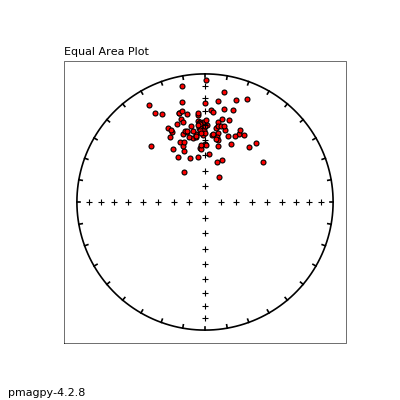

In [57]:
!eqarea.py -f data_files/di_rot/di_rot_example.txt -fmt png -sav
Image(filename='di_rot_example_eq.png')

In [58]:
!di_rot.py -f data_files/di_rot/di_rot_example.txt -F data_files/di_rot/dirot.out -D 359.3 -I 42.1
!eqarea.py -f data_files/di_rot/dirot.out -fmt png -sav

1  saved in  dirot_eq.png


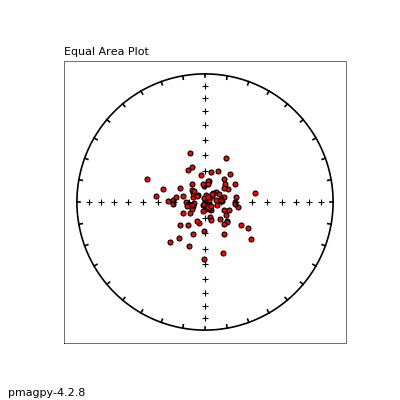

In [59]:
Image(filename='dirot_eq.png')

## di_tilt.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#di_tilt)

In [60]:
!di_tilt.py < data_files/di_tilt/di_tilt_example.dat

   37.5    49.6
  336.5    60.9
  338.0    23.0
  355.7     7.5
    8.2    58.6
    6.2    29.8
  357.0    50.0
  342.8    58.6
  339.3     0.3
    3.9    21.7
  354.3    49.0
    0.3    48.6
  335.8    64.0
   18.1    32.8
  353.9    31.3
   30.8    48.1
   28.0    42.6
  352.8    38.6
  351.4    47.9
   15.0     5.8
  201.4   -27.4
  194.5   -60.3
  151.7   -34.4
  202.4   -54.6
  178.1    13.5
  174.2   -38.4
  192.5   -44.2
  182.4   -10.1
  187.2   -51.7
  158.1     0.5
  181.3   -36.6
  194.1   -47.0
  158.2    -7.0
  204.1   -24.0
  177.7   -36.9
  179.3   -53.7
  173.7   -27.8
  186.3    14.8
  168.9   -37.3
  168.2   -23.5
   13.3    42.3
  348.4    55.8
  353.9    54.8
    8.7    39.2
  340.0     7.0
  336.2    47.9
    3.8    25.4
   14.3    15.7
  323.9    36.7
   12.7    56.4
   14.2    51.6
  348.7    11.4
  345.1    26.8
  350.4    47.4
  352.3     7.3
    3.9    32.2
   31.9    67.9
    8.1    47.2
   32.6    48.6
   18.9     1.5
  159.5   -48.4
  164.1    -8.8
  168.1 

## di_vgp.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#di_vgp)

In [61]:
!di_vgp.py -f data_files/di_vgp/di_vgp_example.dat

  154.7    77.3
    6.6   -69.6


## dipole_pinc.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#dipole_pinc)

In [62]:
!dipole_pinc.py -f data_files/dipole_pinc/dipole_pinc_example.dat

  -41.7


## dipole_plat.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#dipole_plat)

In [63]:
!dipole_plat.py -f data_files/dipole_plat/dipole_plat_example.dat

   12.0


## dir_cart.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#dir_cart)

In [64]:
!dir_cart.py -f data_files/dir_cart/dir_cart_example.dat

8.4859e-01 3.0886e-01 9.3514e-01
-3.8223e+00 3.3441e-01 -1.7083e+00


## dmag_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#dmag_magic)

In [65]:
!dmag_magic.py -WD data_files/3_0/McMurdo -fsp specimens.txt -obj spc -sav -fmt "png" -LT T

-I- Using online data model
25470  records read from  measurements.txt
1  saved in  mc01a_LT-T-Z.png
1  saved in  mc01b_LT-T-Z.png
1  saved in  mc01c_LT-T-Z.png
1  saved in  mc01d_LT-T-Z.png
1  saved in  mc01e_LT-T-Z.png
1  saved in  mc01g_LT-T-Z.png
1  saved in  mc01h_LT-T-Z.png
1  saved in  mc02a_LT-T-Z.png
1  saved in  mc02b_LT-T-Z.png
1  saved in  mc02f_LT-T-Z.png
1  saved in  mc02h_LT-T-Z.png
1  saved in  mc03a_LT-T-Z.png
1  saved in  mc03c_LT-T-Z.png
1  saved in  mc03f_LT-T-Z.png
1  saved in  mc03h_LT-T-Z.png
1  saved in  mc04b_LT-T-Z.png
1  saved in  mc04e_LT-T-Z.png
1  saved in  mc04f_LT-T-Z.png
1  saved in  mc04g_LT-T-Z.png
1  saved in  mc06a_LT-T-Z.png
1  saved in  mc06d_LT-T-Z.png
1  saved in  mc06g_LT-T-Z.png
1  saved in  mc06h_LT-T-Z.png
1  saved in  mc07b_LT-T-Z.png
1  saved in  mc07c_LT-T-Z.png
1  saved in  mc07d_LT-T-Z.png
1  saved in  mc07f_LT-T-Z.png
1  saved in  mc08a_LT-T-Z.png
1  saved in  mc08b_LT-T-Z.png
1  saved in  mc08c_LT-T-Z.png
1  saved in  mc08e_LT-T-Z.png

1  saved in  mc163h1_LT-T-Z.png
1  saved in  mc164a1_LT-T-Z.png
1  saved in  mc164b1_LT-T-Z.png
1  saved in  mc164c1_LT-T-Z.png
1  saved in  mc164f1_LT-T-Z.png
1  saved in  mc164g2_LT-T-Z.png
1  saved in  mc164h1_LT-T-Z.png
1  saved in  mc164i1_LT-T-Z.png
1  saved in  mc164j1_LT-T-Z.png
1  saved in  mc164l2_LT-T-Z.png
1  saved in  mc165b1_LT-T-Z.png
1  saved in  mc165c1_LT-T-Z.png
1  saved in  mc165h2_LT-T-Z.png
1  saved in  mc165i2_LT-T-Z.png
1  saved in  mc166b1_LT-T-Z.png
1  saved in  mc166c1_LT-T-Z.png
1  saved in  mc166h2_LT-T-Z.png
1  saved in  mc166i2_LT-T-Z.png
1  saved in  mc167b1_LT-T-Z.png
1  saved in  mc167d2_LT-T-Z.png
1  saved in  mc167e2_LT-T-Z.png
1  saved in  mc167k1_LT-T-Z.png
1  saved in  mc168a1_LT-T-Z.png
1  saved in  mc168c2_LT-T-Z.png
1  saved in  mc168d1_LT-T-Z.png
1  saved in  mc168f1_LT-T-Z.png
1  saved in  mc168h2_LT-T-Z.png
1  saved in  mc19a_LT-T-Z.png
1  saved in  mc19b_LT-T-Z.png
1  saved in  mc19d_LT-T-Z.png
1  saved in  mc19e_LT-T-Z.png
1  saved in  mc1

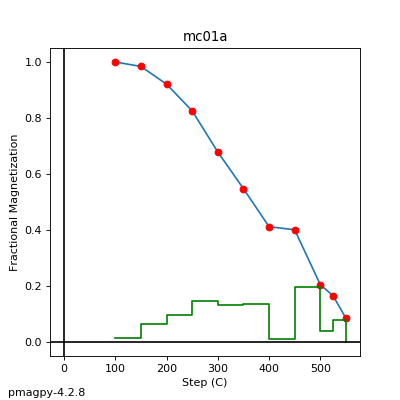

In [66]:
Image(filename="mc01a_LT-T-Z.png")

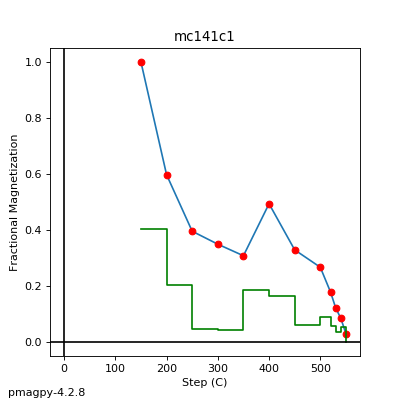

In [67]:
Image("mc141c1_LT-T-Z.png")

In [68]:
!dmag_magic.py -WD data_files/3_0/McMurdo -fsp specimens.txt \
-fsa samples.txt -obj sit -sav -fmt "png" -LT T

-I- Using online data model
25470  records read from  measurements.txt
1  saved in  mc01_LT-T-Z.png
1  saved in  mc02_LT-T-Z.png
1  saved in  mc03_LT-T-Z.png
1  saved in  mc04_LT-T-Z.png
1  saved in  mc06_LT-T-Z.png
1  saved in  mc07_LT-T-Z.png
1  saved in  mc08_LT-T-Z.png
1  saved in  mc09_LT-T-Z.png
1  saved in  mc10_LT-T-Z.png
1  saved in  mc100_LT-T-Z.png
1  saved in  mc102_LT-T-Z.png
1  saved in  mc103_LT-T-Z.png
1  saved in  mc104_LT-T-Z.png
1  saved in  mc105_LT-T-Z.png
1  saved in  mc107_LT-T-Z.png
1  saved in  mc108_LT-T-Z.png
1  saved in  mc109_LT-T-Z.png
1  saved in  mc11_LT-T-Z.png
1  saved in  mc110_LT-T-Z.png
1  saved in  mc111_LT-T-Z.png
1  saved in  mc112_LT-T-Z.png
1  saved in  mc113_LT-T-Z.png
1  saved in  mc115_LT-T-Z.png
1  saved in  mc116_LT-T-Z.png
1  saved in  mc117_LT-T-Z.png
1  saved in  mc119_LT-T-Z.png
1  saved in  mc120_LT-T-Z.png
1  saved in  mc121_LT-T-Z.png
1  saved in  mc122_LT-T-Z.png
1  saved in  mc123_LT-T-Z.png
1  saved in  mc124_LT-T-Z.png
1  saved 

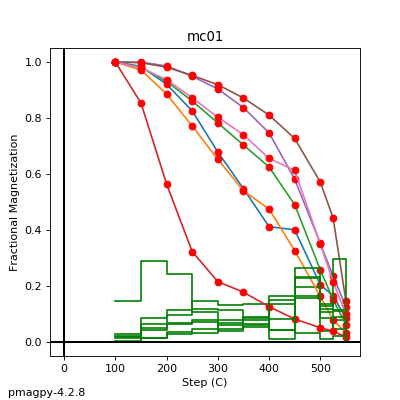

In [69]:
Image(filename="mc01_LT-T-Z.png")

## download_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#download_magic)

In [72]:
!download_magic.py -WD data_files/download_magic -f data_files/download_magic/magic_contribution_16533.txt 

working on:  'contribution'
1  records written to file  data_files/download_magic/contribution.txt
contribution  data put in  data_files/download_magic/contribution.txt
working on:  'locations'
3  records written to file  data_files/download_magic/locations.txt
locations  data put in  data_files/download_magic/locations.txt
working on:  'sites'
52  records written to file  data_files/download_magic/sites.txt
sites  data put in  data_files/download_magic/sites.txt
working on:  'samples'
271  records written to file  data_files/download_magic/samples.txt
samples  data put in  data_files/download_magic/samples.txt
working on:  'specimens'
225  records written to file  data_files/download_magic/specimens.txt
specimens  data put in  data_files/download_magic/specimens.txt
working on:  'measurements'
3072  records written to file  data_files/download_magic/measurements.txt
measurements  data put in  data_files/download_magic/measurements.txt
working on:  'criteria'
20  records written to fil

## eigs_s.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#eigs_s)

In [73]:
!eigs_s.py -f data_files/eigs_s/eigs_s_example.dat

0.33416328 0.33280227 0.33303446 -0.00016631 0.00123163 0.00135521 
0.33555713 0.33197427 0.33246869 0.00085685 0.00025266 0.00098151 
0.33585301 0.33140355 0.33274350 0.00132308 0.00117787 0.00000455 
0.33479390 0.33140817 0.33379796 -0.00043088 0.00048858 0.00045610 
0.33502916 0.33117944 0.33379149 -0.00106313 0.00029828 0.00035883 
0.33407047 0.33226910 0.33366045 -0.00000638 0.00098445 0.00005996 
0.33486328 0.33215088 0.33298591 -0.00034279 0.00038178 0.00020145 
0.33509853 0.33195898 0.33294258 0.00076976 0.00056717 0.00011960 


## eq_di.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#eq_di)

In [74]:
!eq_di.py -f data_files/eq_di/eq_di_example.dat > data_files/eq_di/eq_di.out
!eqarea.py -f data_files/eq_di/eq_di.out -fmt png -sav

1  saved in  eq_di_eq.png


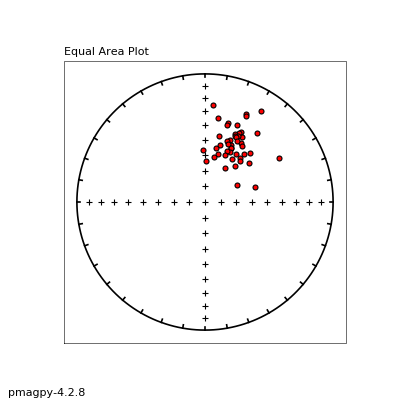

In [75]:
Image(filename='eq_di_eq.png')

## eqarea.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#eqarea)

In [76]:
!eqarea.py -f data_files/eqarea/fishrot.out -fmt png -sav

1  saved in  fishrot_eq.png


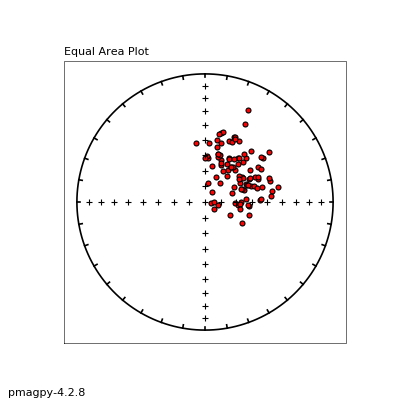

In [77]:
Image(filename='fishrot_eq.png')

## eqarea_ell.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#eqarea_ell)

In [78]:
!eqarea_ell.py -f data_files/eqarea_ell/tk03.out -ell B -fmt png -sav

     dec   357.8
     inc    60.3
     Edec   105.7
     Einc    10.0
     Zdec    21.0
     Zinc   -27.6
     n        20
     Zeta     4.5
     Eta     4.5
1  saved in  data_files-eqarea_ell-tk03.out_eq.png


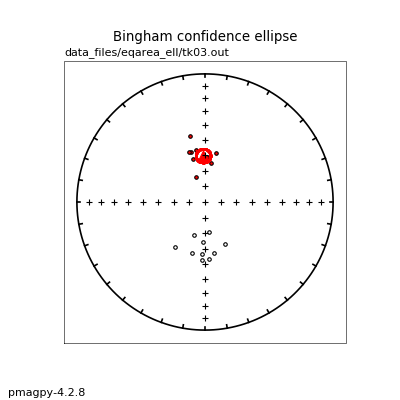

In [79]:
Image(filename='data_files-eqarea_ell-tk03.out_eq.png')

## eqarea_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#eqarea_magic)

In [80]:
!eqarea_magic.py -WD data_files/3_0/McMurdo -f sites.txt -sav -fmt "png"

-I- Using online data model
1  saved in  all_McMurdo_g_eqarea.png


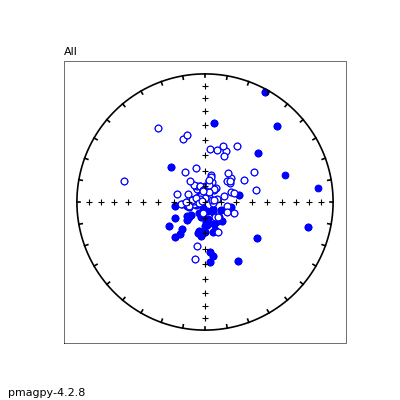

In [81]:
Image(filename="all_McMurdo_g_eqarea.png")

In [82]:
!download_magic.py -WD data_files/nrm_specimens_magic \
-f data_files/nrm_specimens_magic/magic_contribution_15143.txt -DM 3

working on:  'contribution'
1  records written to file  data_files/nrm_specimens_magic/contribution.txt
contribution  data put in  data_files/nrm_specimens_magic/contribution.txt
working on:  'locations'
3  records written to file  data_files/nrm_specimens_magic/locations.txt
locations  data put in  data_files/nrm_specimens_magic/locations.txt
working on:  'sites'
52  records written to file  data_files/nrm_specimens_magic/sites.txt
sites  data put in  data_files/nrm_specimens_magic/sites.txt
working on:  'samples'
437  records written to file  data_files/nrm_specimens_magic/samples.txt
samples  data put in  data_files/nrm_specimens_magic/samples.txt
working on:  'specimens'
226  records written to file  data_files/nrm_specimens_magic/specimens.txt
specimens  data put in  data_files/nrm_specimens_magic/specimens.txt
working on:  'measurements'
3072  records written to file  data_files/nrm_specimens_magic/measurements.txt
measurements  data put in  data_files/nrm_specimens_magic/measure

-I- Using online data model
1  saved in  Snake_River_sr01_sr01e_sr01e2_g_eqarea.png
1  saved in  Snake_River_sr01_sr01g_sr01g2_g_eqarea.png
1  saved in  Snake_River_sr03_sr03f_sr03f1_g_eqarea.png
1  saved in  Snake_River_sr03_sr03h_sr03h2_g_eqarea.png
1  saved in  Snake_River_sr03_sr03k_sr03k1_g_eqarea.png
1  saved in  Snake_River_sr04_sr04e_sr04e1_g_eqarea.png
1  saved in  Snake_River_sr04_sr04f_sr04f2_g_eqarea.png
1  saved in  Snake_River_sr09_sr09b_sr09b2_g_eqarea.png
1  saved in  Snake_River_sr09_sr09e_sr09e2_g_eqarea.png
1  saved in  Snake_River_sr09_sr09f_sr09f2_g_eqarea.png
1  saved in  Snake_River_sr11_sr11a_sr11a1_g_eqarea.png
1  saved in  Snake_River_sr11_sr11b_sr11b1_g_eqarea.png
1  saved in  Snake_River_sr11_sr11c_sr11c1_g_eqarea.png
1  saved in  Snake_River_sr11_sr11e_sr11e2_g_eqarea.png
1  saved in  Snake_River_sr11_sr11g_sr11g2_g_eqarea.png
1  saved in  Snake_River_sr11_sr11i_sr11i1_g_eqarea.png
1  saved in  Snake_River_sr11_sr11j_sr11j3_g_eqarea.png
1  saved in  Snake_R

1  saved in  Snake_River_sr20_sr20c_sr20c1_g_eqarea.png
1  saved in  Snake_River_sr20_sr20f_sr20f1_g_eqarea.png
1  saved in  Snake_River_sr20_sr20g_sr20g1_g_eqarea.png
1  saved in  Snake_River_sr20_sr20i_sr20i2_g_eqarea.png
1  saved in  Snake_River_sr20_sr20j_sr20j2_g_eqarea.png
1  saved in  Snake_River_sr21_sr21b_sr21b2_g_eqarea.png
1  saved in  Snake_River_sr21_sr21g_sr21g2_g_eqarea.png
1  saved in  Snake_River_sr21_sr21j_sr21j2_g_eqarea.png
1  saved in  Snake_River_sr22_sr22a_sr22a1_g_eqarea.png
1  saved in  Snake_River_sr22_sr22g_sr22g1_g_eqarea.png
1  saved in  Snake_River_sr22_sr22i_sr22i2_g_eqarea.png
1  saved in  Snake_River_sr23_sr23c_sr23c2_g_eqarea.png
1  saved in  Snake_River_sr23_sr23e_sr23e1_g_eqarea.png
1  saved in  Snake_River_sr23_sr23f_sr23f1_g_eqarea.png
1  saved in  Snake_River_sr24_sr24i_sr24i2_g_eqarea.png
1  saved in  Snake_River_sr25_sr25c_sr25c2_g_eqarea.png
1  saved in  Snake_River_sr26_sr26b_sr26b2_g_eqarea.png
1  saved in  Snake_River_sr26_sr26e_sr26e2_g_eqa

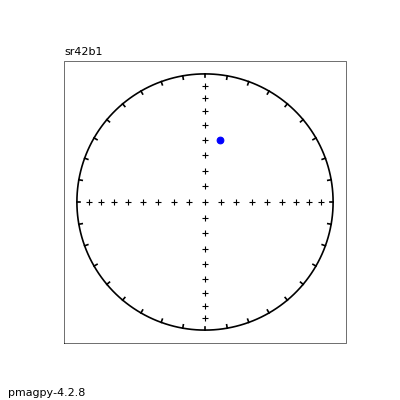

In [83]:
# plot by specimen
!eqarea_magic.py -f data_files/nrm_specimens_magic/nrm_specimens.txt -crd g -fmt png -sav -obj spc
Image('Snake_River_sr42_sr42b_sr42b1_g_eqarea.png')

-I- Using online data model
-W- Couldn't read in sites data
-I- Make sure you've provided the correct file name
-W- Couldn't read in sites data
-I- Make sure you've provided the correct file name
-W- Couldn't read in sites data
-I- Make sure you've provided the correct file name
1  saved in  all_g_eqarea.png


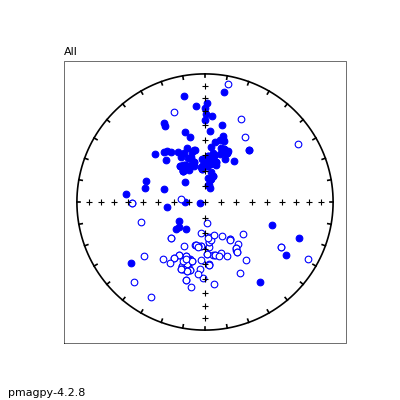

In [84]:
# plotting all with no sites file

# get rid of any png files lying around
for fname in glob.glob("*.png"):
    os.remove(fname)

# temporarily hide sites file
try:
    os.rename('data_files/nrm_specimens_magic/sites.txt', 'data_files/nrm_specimens_magic/temp.txt')
except FileNotFoundError:
    pass
    
# run eqarea_magic    
!eqarea_magic.py -f data_files/nrm_specimens_magic/nrm_specimens.txt -crd g -fmt png -sav -obj all
Image('all_g_eqarea.png')


-I- Using online data model
-W- Couldn't read in sites data
-I- Make sure you've provided the correct file name
-W- Couldn't read in sites data
-I- Make sure you've provided the correct file name
-W- Couldn't read in sites data
-I- Make sure you've provided the correct file name
1  saved in  sr01_sr01e_g_eqarea.png
1  saved in  sr01_sr01g_g_eqarea.png
1  saved in  sr03_sr03f_g_eqarea.png
1  saved in  sr03_sr03h_g_eqarea.png
1  saved in  sr03_sr03k_g_eqarea.png
1  saved in  sr04_sr04e_g_eqarea.png
1  saved in  sr04_sr04f_g_eqarea.png
1  saved in  sr09_sr09b_g_eqarea.png
1  saved in  sr09_sr09e_g_eqarea.png
1  saved in  sr09_sr09f_g_eqarea.png
1  saved in  sr11_sr11a_g_eqarea.png
1  saved in  sr11_sr11b_g_eqarea.png
1  saved in  sr11_sr11c_g_eqarea.png
1  saved in  sr11_sr11e_g_eqarea.png
1  saved in  sr11_sr11g_g_eqarea.png
1  saved in  sr11_sr11i_g_eqarea.png
1  saved in  sr11_sr11j_g_eqarea.png
1  saved in  sr12_sr12c_g_eqarea.png
1  saved in  sr12_sr12h_g_eqarea.png
1  saved in  sr16

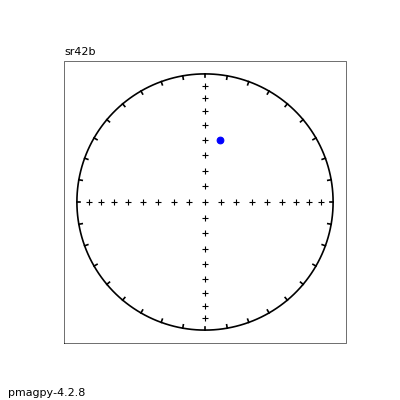

In [85]:
# plotting by sample with no sites file
# get rid of any png files lying around
for fname in glob.glob("*.png"):
    os.remove(fname)
!eqarea_magic.py -f data_files/nrm_specimens_magic/nrm_specimens.txt -crd g -fmt png -sav -obj sam
Image('sr42_sr42b_g_eqarea.png')

In [86]:
# can't get site data with no site or sample file, will fail gracefully
!mv data_files/nrm_specimens_magic/samples.txt data_files/nrm_specimens_magic/temp_samples.txt
!eqarea_magic.py -f data_files/nrm_specimens_magic/nrm_specimens.txt -crd g -fmt png -sav -obj sit
!mv  data_files/nrm_specimens_magic/temp_samples.txt data_files/nrm_specimens_magic/samples.txt

-I- Using online data model
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-E- You can't plot by site with the data provided


-I- Using online data model
1  saved in  Snake_River_sr01_sr01e_g_eqarea.png
1  saved in  Snake_River_sr01_sr01g_g_eqarea.png
1  saved in  Snake_River_sr03_sr03f_g_eqarea.png
1  saved in  Snake_River_sr03_sr03h_g_eqarea.png
1  saved in  Snake_River_sr03_sr03k_g_eqarea.png
1  saved in  Snake_River_sr04_sr04e_g_eqarea.png
1  saved in  Snake_River_sr04_sr04f_g_eqarea.png
1  saved in  Snake_River_sr09_sr09b_g_eqarea.png
1  saved in  Snake_River_sr09_sr09e_g_eqarea.png
1  saved in  Snake_River_sr09_sr09f_g_eqarea.png
1  saved in  Snake_River_sr11_sr11a_g_eqarea.png
1  saved in  Snake_River_sr11_sr11b_g_eqarea.png
1  saved in  Snake_River_sr11_sr11c_g_eqarea.png
1  saved in  Snake_River_sr11_sr11e_g_eqarea.png
1  saved in  Snake_River_sr11_sr11g_g_eqarea.png
1  saved in  Snake_River_sr11_sr11i_g_eqarea.png
1  saved in  Snake_River_sr11_sr11j_g_eqarea.png
1  saved in  Snake_River_sr12_sr12c_g_eqarea.png
1  saved in  Snake_River_sr12_sr12h_g_eqarea.png
1  saved in  Snake_River_sr16_sr16e_g_eqa

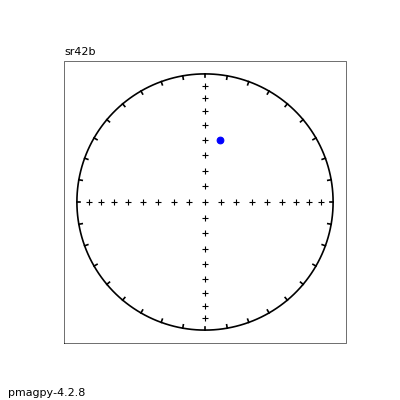

In [87]:
# plotting by sample
# get rid of any png files lying around
for fname in glob.glob("*.png"):
    os.remove(fname)
try:
    os.rename('data_files/nrm_specimens_magic/temp.txt', 'data_files/nrm_specimens_magic/sites.txt')
except FileNotFoundError:
    pass
!eqarea_magic.py -f data_files/nrm_specimens_magic/nrm_specimens.txt -crd g -fmt png -sav -obj sam
Image('Snake_River_sr42_sr42b_g_eqarea.png')

-I- Using online data model
1  saved in  all_Snake_River_g_eqarea.png


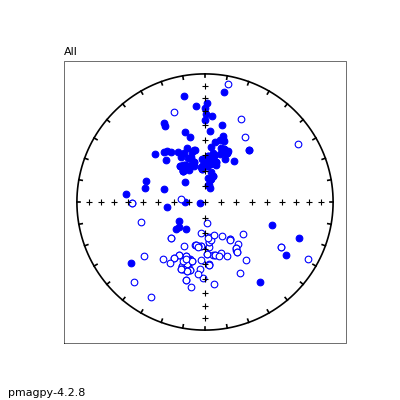

In [88]:
# plotting all
for fname in glob.glob("*.png"):
    os.remove(fname)
!eqarea_magic.py -WD data_files/nrm_specimens_magic/ -f nrm_specimens.txt -crd g -fmt png -sav -obj all
Image('all_Snake_River_g_eqarea.png')

-I- Using online data model
1  saved in  all_Snake_River_g_eqarea.png


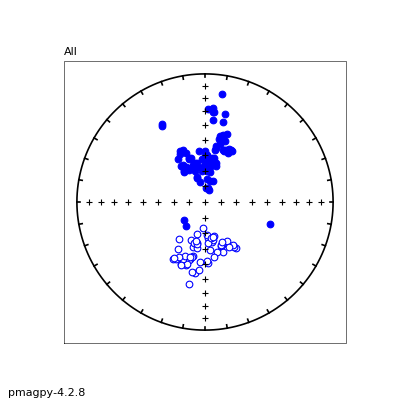

In [89]:
# using unknown option for -obj, will default to plotting all instead
for fname in glob.glob("*.png"):
    os.remove(fname)
!eqarea_magic.py -f data_files/nrm_specimens_magic/samples.txt -crd g -fmt png -sav -obj loc  # will use 'all'
Image('all_Snake_River_g_eqarea.png')

## find_ei.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#find_ei)

In [92]:
!find_ei.py -f data_files/find_EI/find_EI_example.dat -fmt png -sav -n 300

Bootstrapping.... be patient
25  out of  300
50  out of  300
75  out of  300
100  out of  300
125  out of  300
150  out of  300
175  out of  300
200  out of  300
225  out of  300
250  out of  300
275  out of  300
300  out of  300
1  saved in  findEI_eq.png
2  saved in  findEI_ei.png
3  saved in  findEI_cdf.png
4  saved in  findEI_v2.png


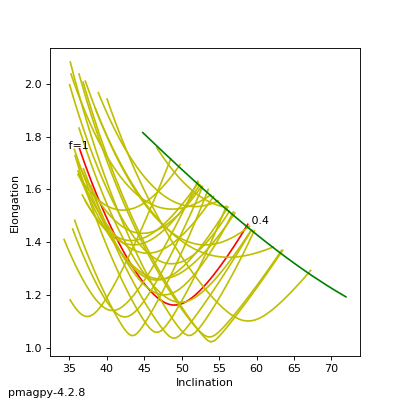

In [93]:
Image(filename='findEI_ei.png')

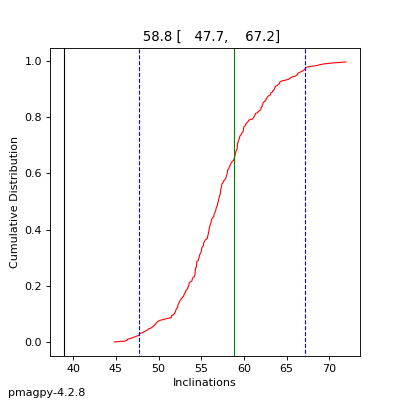

In [94]:
Image(filename='findEI_cdf.png')

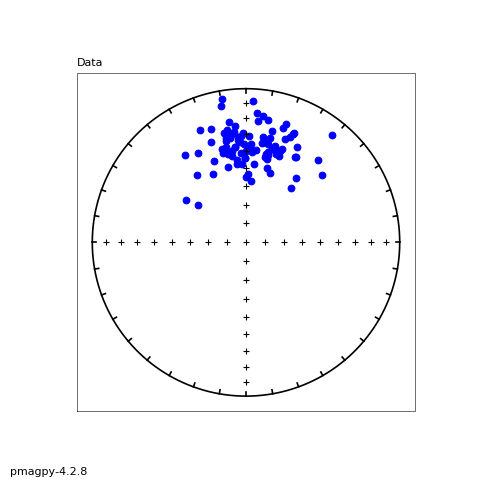

In [95]:
Image(filename='findEI_eq.png')

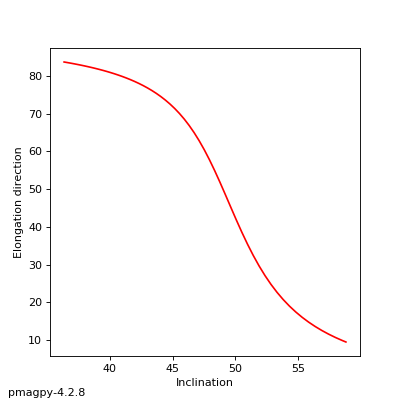

In [96]:
Image(filename='findEI_v2.png')

## fisher.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#fisher)

In [97]:
!fisher.py -k 30 -n 10

  136.1    78.2 
  336.6    82.5 
  185.8    73.6 
  317.8    70.0 
  122.7    77.7 
  251.9    84.0 
  196.9    83.0 
  312.4    60.5 
  140.6    78.0 
  254.3    78.8 


## fishqq.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#fishqq)

In [98]:
!fishqq.py -f data_files/fishqq/fishqq_example.txt -fmt png -sav

1  saved in  data_files-fishqq-fishqq_example.txt_unf1.png
2  saved in  data_files-fishqq-fishqq_example.txt_exp1.png


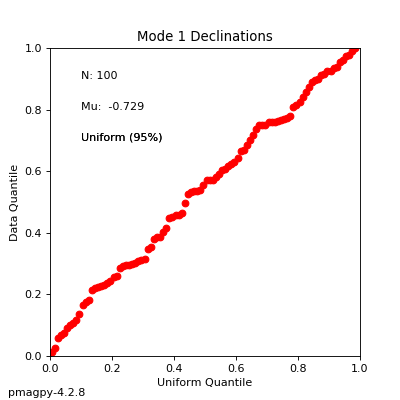

In [99]:
Image(filename='data_files-fishqq-fishqq_example.txt_unf1.png')

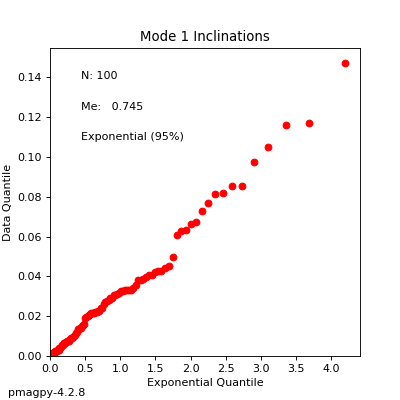

In [100]:
Image(filename='data_files-fishqq-fishqq_example.txt_exp1.png')

## fishrot.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#fishrot)

In [101]:
!fishrot.py -n 5 -D 33 -I 41 -k 50

   25.6    42.4 
   45.3    31.8 
   35.0    34.0 
   27.3    28.7 
   28.7    49.0 


## foldtest.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#foldtest)

In [102]:
!foldtest.py -f data_files/foldtest/foldtest_example.dat -fmt png -sav -n 300

doing  300  iterations...please be patient.....
0
50
100
150
200
250
81 - 118 Percent Unfolding
range of all bootstrap samples:  73  -  127
1  saved in  foldtest_ge.png
2  saved in  foldtest_st.png
3  saved in  foldtest_ta.png


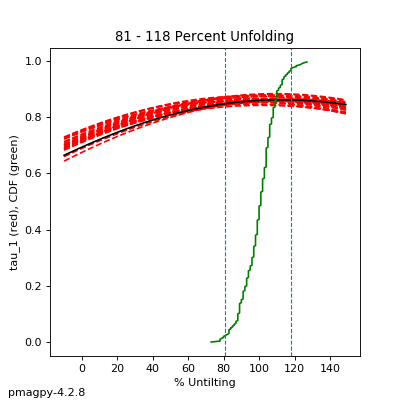

In [103]:
Image(filename='foldtest_ta.png')

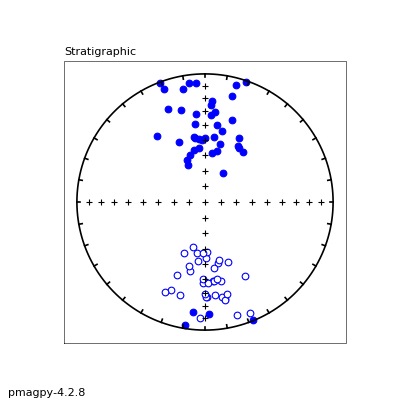

In [104]:
Image(filename='foldtest_st.png')

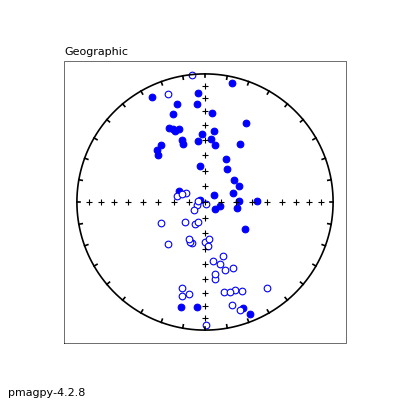

In [105]:
Image(filename='foldtest_ge.png')

## foldtest_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#foldtest_magic)

In [106]:
!foldtest_magic.py -f data_files/foldtest_magic/sites.txt -fmt png -sav -DM 3 -n 300 -exc

doing  300  iterations...please be patient.....
0
50
100
150
200
250
27 - 96 Percent Unfolding
1  saved in  foldtest_ge.png
2  saved in  foldtest_st.png
3  saved in  foldtest_ta.png


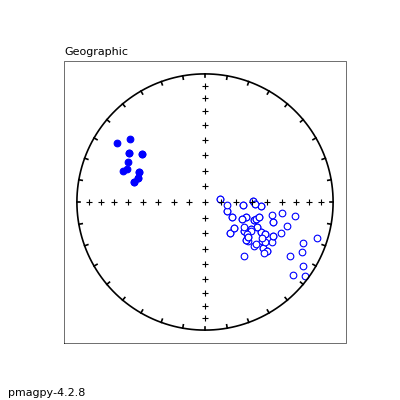

In [107]:
Image(filename='foldtest_ge.png')

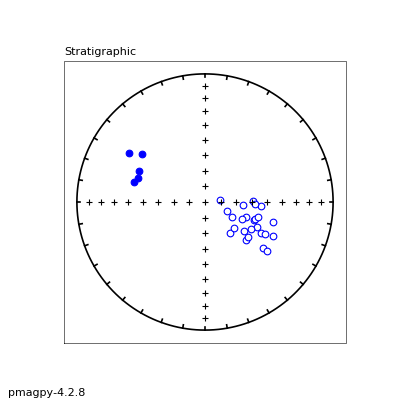

In [111]:
Image(filename='foldtest_st.png')

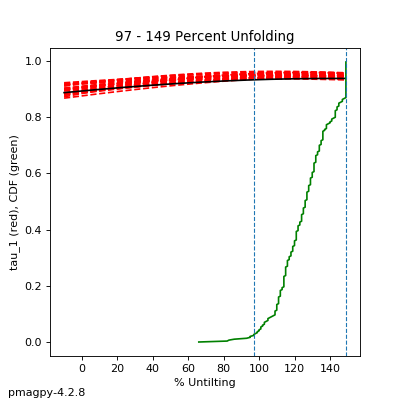

In [112]:
Image(filename='foldtest_ta.png')

## forc_diagram.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#forc_diagram)

1  saved in  forc.png


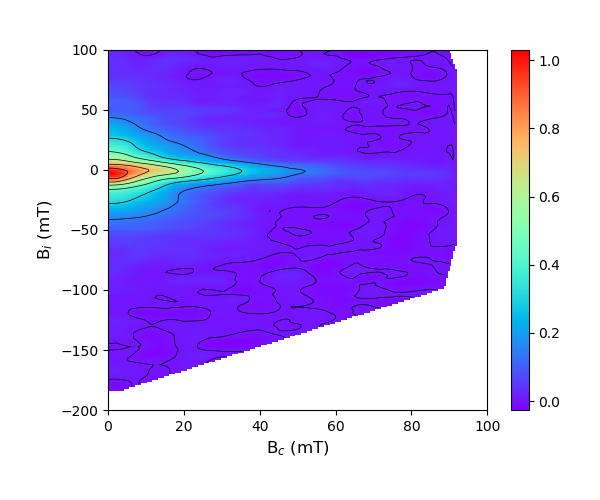

In [113]:
!forc_diagram.py -f data_files/forc_diagram/conventional_example.forc -sf 3 -sav -fmt png
Image('forc.png')

## gaussian.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#gaussian)

In [114]:
!gaussian.py -s 3 -n 1000 -m 10. -F data_files/gaussian/gaussian.out
!histplot.py -f data_files/gaussian/gaussian.out -fmt png -sav

plot saved in  hist.png


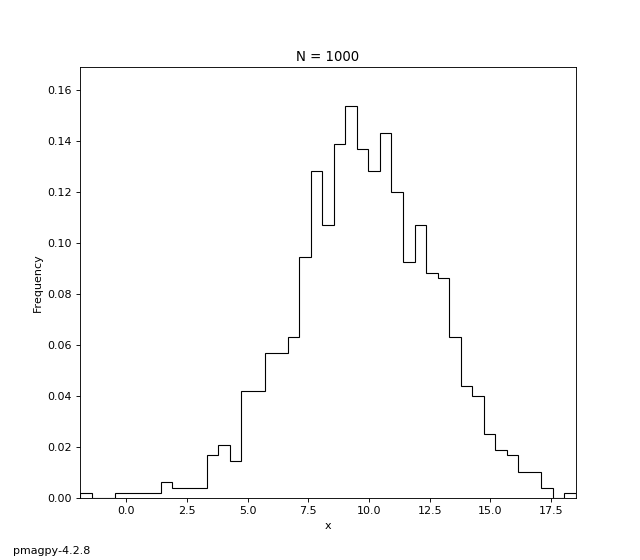

In [115]:
Image(filename='hist.png')

## generic_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#generic_magic)

In [116]:
!generic_magic.py -f data_files/convert_2_magic/generic_magic/generic_magic_example.txt -exp PI

-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 23 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 2 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 2 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 2 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 23 records written to measurements file


## gobing.py 
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#gobing)

In [117]:
!gobing.py -f data_files/gobing/gobing_example.txt

  357.8    60.3     4.5   105.7    10.0     4.5    21.0   -27.6 20


## gofish.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#gofish)

In [118]:
!gofish.py -f data_files/gofish/fishrot.out

   10.8    39.6    10     9.8484     59.4     6.3    10.5


## gokent.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#gokent)

In [119]:
!gokent.py -f data_files/gokent/gokent_example.txt

  359.2    55.0     9.3   147.7    30.8     7.8   246.8    14.9 20


## goprinc.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#goprinc)

In [120]:
!goprinc.py -f data_files/goprinc/tk03.out

0.93863    11.0    58.6 0.04258   226.4    26.5 0.01879   128.3    15.6 20


## grab_magic_key.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#grab_magic_key)

In [121]:
!grab_magic_key.py -f data_files/download_magic/sites.txt -key lat

42.60264
42.60264
42.6026
42.60352
42.6035
42.60104000000001
42.601000000000006
42.73656
42.7366
42.8418
42.8418
42.8657
42.8657
42.92031
42.9203
42.56857
42.49964
42.49962
42.4996
42.50001
42.5
42.52872
42.5287
42.45559
42.4556
42.48923
42.4892
42.46186
42.4619
42.69156
42.65289
42.6529
43.30504000000001
43.305
43.36817
43.36817
43.3682
43.42133
43.4213
43.8859
43.8859
43.8859
43.84273
43.8427
43.53289
43.57494000000001
43.57494000000001
43.5749
44.15663
44.1566
44.18629
42.6026


## histplot.py 

see [\[gaussian.py\]](#gaussian.py)

[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#histplot)



## huji_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#huji_magic)

In [122]:
!huji_magic.py -f data_files/convert_2_magic/HUJI_magic/Massada_AF_HUJI_new_format.txt -LP T

-W- Identical treatments in file data_files/convert_2_magic/HUJI_magic/Massada_AF_HUJI_new_format.txt magfile line 818: specimen M5-119E, treatment 0 ignoring the first. 
-I- done reading file data_files/convert_2_magic/HUJI_magic/Massada_AF_HUJI_new_format.txt
-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 616 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 56 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 56 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 29 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 616 records written to measurements file


## huji_sample_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#huji_sample_magic)

In [123]:
!huji_sample_magic.py -f data_files/convert_2_magic/HUJI_magic/magdelkrum_datafile.txt

-I- reading in: /Users/nebula/Python/PmagPy/data_files/convert_2_magic/HUJI_magic/magdelkrum_datafile.txt
57  records written to file  /Users/nebula/Python/PmagPy/samples.txt
57  records written to file  /Users/nebula/Python/PmagPy/sites.txt
Sample info saved in  /Users/nebula/Python/PmagPy/samples.txt
Site info saved in  /Users/nebula/Python/PmagPy/sites.txt


## hysteresis_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#hysteresis_magic)

In [251]:
# for MagIC data model 3:
!hysteresis_magic.py -ID data_files/hysteresis_magic/ -f measurements.txt \
    -spc IS06a-1  -fmt png -sav

1  saved in  /Users/nebula/Python/PmagPy/IS06a-1_hyst.png
2  saved in  /Users/nebula/Python/PmagPy/IS06a-1_deltaM.png
3  saved in  /Users/nebula/Python/PmagPy/IS06a-1_DdeltaM.png
4  saved in  /Users/nebula/Python/PmagPy/IS06a-1_irm.png
-I- Using online data model
-I- Using online data model
-I- writing specimens records to /Users/nebula/Python/PmagPy/specimens.txt
-I- 10 records written to specimens file


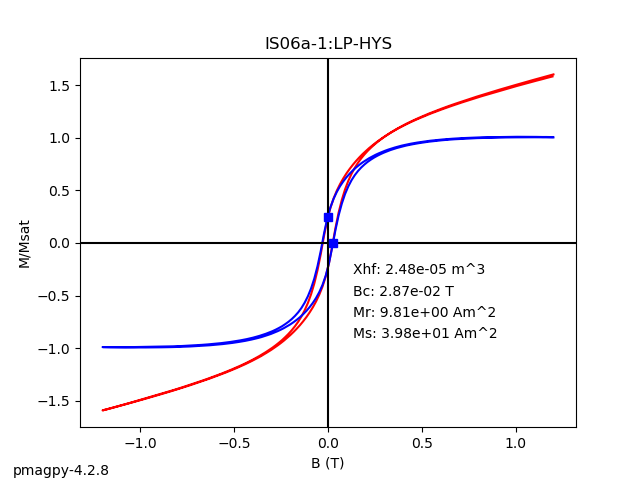

In [252]:
Image(filename='IS06a-1_hyst.png')

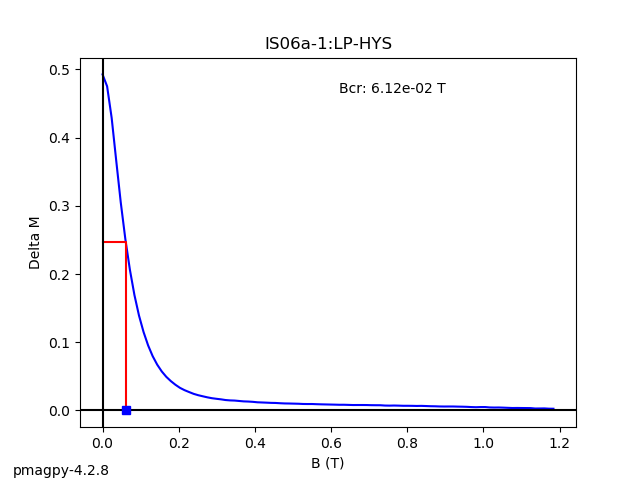

In [253]:
Image('IS06a-1_deltaM.png')

In [256]:
!hysteresis_magic.py -ID data_files/hysteresis_magic/ -f measurements.txt \
    -spc IS06a-1  -fmt png -sav

1  saved in  /Users/nebula/Python/PmagPy/IS06a-1_hyst.png
2  saved in  /Users/nebula/Python/PmagPy/IS06a-1_deltaM.png
3  saved in  /Users/nebula/Python/PmagPy/IS06a-1_DdeltaM.png
4  saved in  /Users/nebula/Python/PmagPy/IS06a-1_irm.png
-I- Using online data model
-I- Using online data model
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 10 records written to specimens file


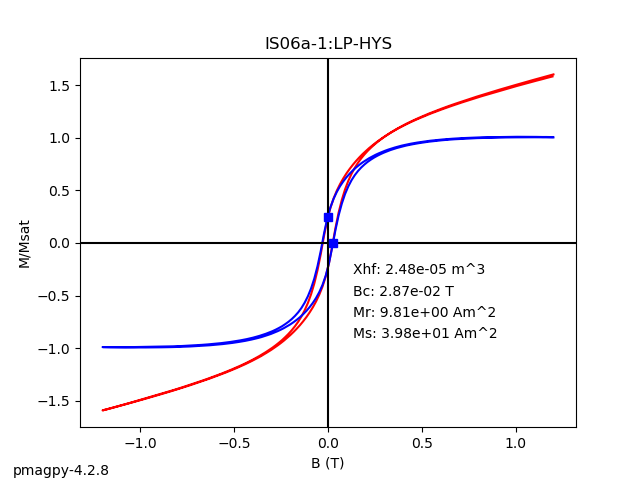

In [257]:
Image(filename='IS06a-1_hyst.png')

## iodp_dscr_magic.py


In [137]:
!iodp_dscr_magic.py -f data_files/convert_2_magic/IODP_srm_magic/IODP_LIMS_SRMdiscrete_344_1414A.csv

processing:  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/IODP_srm_magic/IODP_LIMS_SRMdiscrete_344_1414A.csv
-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 112 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 56 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 32 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 112 records written to measurements file


## iodp_jr6_magic.py

In [138]:
!iodp_jr6_magic.py -f data_files/convert_2_magic/IODP_jr6_magic/test.jr6

-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 1 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 1 records written to measurements file


## iodp_srm_magic.py

In [139]:
!iodp_srm_magic.py -f data_files/convert_2_magic/iodp_srm_magic/SRM_318_U1359_B_A.csv

processing: data_files/convert_2_magic/iodp_srm_magic/SRM_318_U1359_B_A.csv
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0.00, skipping
No dec or inc found for specimen 318-U1359B-003H_2A-0

## igrf.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#igrf)


In [140]:
!igrf.py -ages -3000 1950 50 -loc 33 -117 -mod pfm9k -plt -fmt png -sav

Figure saved as:  igrf.png


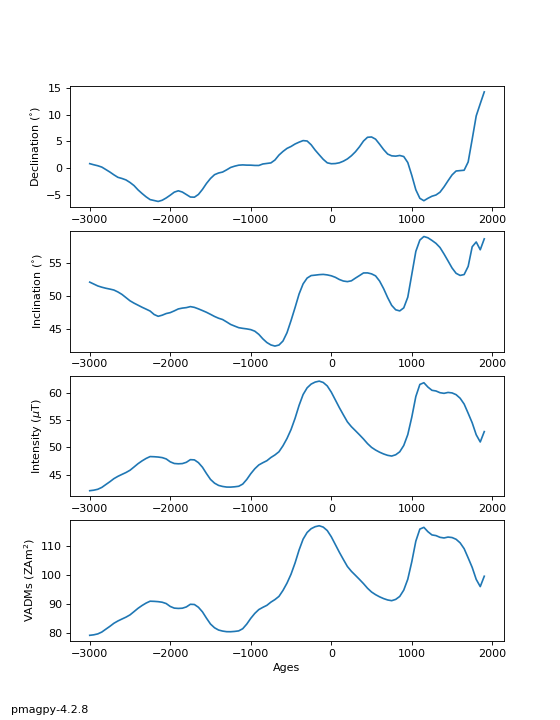

In [141]:
Image(filename='igrf.png')

## install_etopo.py


In [142]:
# install high resolution maps, only used for Basemap
!install_etopo.py

-I- Some mapping utilities use the Etopo package for topography and these data sets do not come standard with the Python installation of Basemap.  However, if you are using cartopy for plotting (recommended), you do not need to run install_etopo.py.
-E- Basemap does not appear to be installed, aborting program...


## incfish.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#incfish)

In [143]:
!incfish.py -f data_files/incfish/incfish_example_inc.dat

   57.1    61.0  100     92.9    13.9     1.0


## irmaq_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#irmaq_magic)

In [144]:
!sio_magic.py -f data_files/irmaq_magic/U1359A_IRM_coil2.txt -LP I -V 2 \
    -WD data_files/irmaq_magic/ -F U1359A_IRM_coil2.magic -loc U1359A -spc 0 -ncn 5 \
    -Fsp coil2_specimens.txt -Fsa coil2_samples.txt -Fsi coil2_sites.txt -Flo coil2_locations.txt
    
!sio_magic.py -f data_files/irmaq_magic/U1359A_IRM_coil3.txt -LP I -V 3 \
    -WD data_files/irmaq_magic/ -F U1359A_IRM_coil3.magic -loc U1359A -spc 0 -ncn 5 \
    -Fsp coil3_specimens.txt -Fsa coil3_samples.txt -Fsi coil3_sites.txt -Flo coil3_locations.txt

!combine_magic.py -F data_files/irmaq_magic/measurements.txt \
    -f data_files/irmaq_magic/U1359A_IRM_coil2.magic \
    data_files/irmaq_magic/U1359A_IRM_coil3.magic -dm 3
    
!combine_magic.py -F measurements.txt -WD data_files/irmaq_magic \
    -f U1359A_IRM_coil2.magic U1359A_IRM_coil3.magic -dm 3
    
!combine_magic.py -F specimens.txt -WD data_files/irmaq_magic \
    -f coil2_specimens.txt coil3_specimens.txt
    
!combine_magic.py -F samples.txt -WD data_files/irmaq_magic \
    -f coil2_samples.txt coil3_samples.txt
    
!combine_magic.py -F sites.txt -WD data_files/irmaq_magic \
    -f coil2_sites.txt coil3_sites.txt
    
!combine_magic.py -F locations.txt -WD data_files/irmaq_magic \
    -f coil2_locations.txt coil3_locations.txt
    
    

-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 536 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/irmaq_magic/coil2_specimens.txt
-I- 49 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/irmaq_magic/coil2_samples.txt
-I- 49 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/irmaq_magic/coil2_sites.txt
-I- 49 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/irmaq_magic/coil2_locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/irmaq_magic/U1359A_IRM_coil2.magic
-I- 536 records written to measurements file
-I- Using online data model
-I- Using online data model
adding measuremen

In [145]:
!irmaq_magic.py -f data_files/irmaq_magic/measurements.txt -fmt png -sav -DM 3

-W- You are trying to plot measurements by location
    By default, this information is not available in your measurement file.
    Trying to acquire this information from /Users/nebula/Python/PmagPy/data_files/irmaq_magic
-I- Using online data model
-I- Found location information, continuing with plotting
U1359A
1  saved in  U1359A_LP-IRM.png


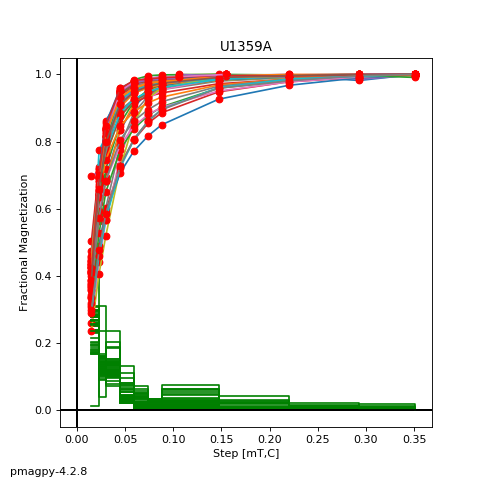

In [146]:
Image("U1359A_LP-IRM.png")

## jr6_jr6_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#jr6_jr6_magic)

In [150]:
!jr6_jr6_magic.py -f data_files/convert_2_magic/JR6_magic/AF.jr6

.
-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 655 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 57 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 17 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 10 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 655 records written to measurements file


## jr6_txt_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#jr6_txt_magic)

In [151]:
!jr6_txt_magic.py -f data_files/convert_2_magic/JR6_magic/AF.txt

-I- Using less strict decoding for /Users/nebula/Python/PmagPy/data_files/convert_2_magic/JR6_magic/AF.txt, output may have formatting errors
-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 655 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 57 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 17 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 10 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 655 records written to measurements file


## k15_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#k15_magic)

In [152]:
!k15_magic.py -WD data_files/k15_magic  -spc 0 -f data_files/k15_s/k15_example.dat -loc "Troodos Ophiolite" 

Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -Fa, -Fr, -ncn, -DM
8  records written to file  /Users/nebula/Python/PmagPy/data_files/k15_magic/samples.txt
48  records written to file  /Users/nebula/Python/PmagPy/data_files/k15_magic/specimens.txt
120  records written to file  /Users/nebula/Python/PmagPy/data_files/k15_magic/measurements.txt
Data saved to: /Users/nebula/Python/PmagPy/data_files/k15_magic/measurements.txt, /Users/nebula/Python/PmagPy/data_files/k15_magic/specimens.txt, /Users/nebula/Python/PmagPy/data_files/k15_magic/samples.txt


In [153]:
!k15_s.py -f data_files/k15_s/k15_example.dat

0.33146986 0.33413991 0.33439023 0.00075095 -0.00083439 -0.00016688 0.00008618
0.33335925 0.33335925 0.33328149 -0.00155521 -0.00132193 0.00116641 0.00017193
0.33097634 0.33573565 0.33328801 0.00163177 0.00013598 0.00000000 0.00018131
0.33150029 0.33465420 0.33384551 -0.00064696 -0.00056609 -0.00048522 0.00014863
0.33121986 0.33521197 0.33356816 -0.00046966 -0.00046966 -0.00086104 0.00018376
0.33179570 0.33405602 0.33414828 -0.00009226 -0.00004613 -0.00027677 0.00010474
0.33243163 0.33439898 0.33316939 0.00106564 0.00032789 0.00000000 0.00017624
0.33175478 0.33512715 0.33311808 0.00078928 0.00000000 -0.00007175 0.00011116


## kly4s_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#kly4s_magic)

In [154]:
!kly4s_magic.py -f data_files/convert_2_magic/kly4s_magic/KLY4S_magic_example.dat

Using default arguments for: -F, -A, -WD, -ID, -Fsa, -Fsi, -fad, -fsa, -fsp, -Fsp, -Fa, -ocn, -usr, -loc, -ins, -spc, -ncn, -DM
anisotropy data added to specimen records
52  records written to file  ./specimens.txt
specimen information written to new file: ./specimens.txt
26  records written to file  ./measurements.txt
measurement data saved in  ./measurements.txt
26  records written to file  samples.txt
26  records written to file  sites.txt


## ldeo_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#ldeo_magic)

In [155]:
!ldeo_magic.py -f data_files/convert_2_magic/LDEO_magic/ldeo_magic_example.dat

-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 35 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 35 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 35 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 35 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 35 records written to measurements file


# livdb_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#livdb_magic)

In [156]:
# is a GUI and doesn't work in a notebook
# see _PmagPy-nb.ipynb for how to use convert.livdb

# lnp_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#lnp_magic)

In [157]:
!lnp_magic.py -f data_files/lnp_magic/specimens.txt -crd g -fmt png -sav -fsa data_files/lnp_magic/samples.txt

-I- Using online data model
sv01
Site lines planes  kappa   a95   dec   inc
sv01 0  5     286      6.6    179.0    -54.3  4.9948 
% tilt correction:  0
1  saved in  sv01_g_eqarea.png
sv02
Site lines planes  kappa   a95   dec   inc
sv02 4  2     113      6.6    338.8     38.6  5.9647 
% tilt correction:  0
1  saved in  sv02_g_eqarea.png
sv03
Site lines planes  kappa   a95   dec   inc
sv03 5  3     108      5.5    344.0     53.1  7.9491 
% tilt correction:  0
1  saved in  sv03_g_eqarea.png
sv04
Site lines planes  kappa   a95   dec   inc
sv04 5  0     286      4.5    346.9     50.7  4.9860 
% tilt correction:  0
1  saved in  sv04_g_eqarea.png
sv05
Site lines planes  kappa   a95   dec   inc
sv05 5  3     165      4.5    164.1    -51.3  7.9667 
% tilt correction:  0
1  saved in  sv05_g_eqarea.png
sv06
Site lines planes  kappa   a95   dec   inc
sv06 2  3      81      9.7    351.4    -32.0  4.9691 
% tilt correction:  0
1  saved in  sv06_g_eqarea.png
sv07
Site lines planes  kappa   a95   dec 

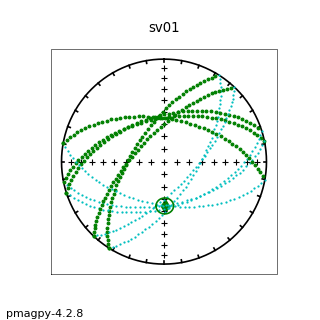

In [158]:
Image(filename='sv01_g_eqarea.png')

## lowes.py

lowes.py doesn't work from within a notebook. yet.

## lowrie.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#lowrie)

In [163]:
!lowrie.py -f data_files/lowrie/lowrie_example.dat -fmt png -sav

-I- Using less strict decoding for data_files/lowrie/lowrie_example.dat, output may have formatting errors
318-U1359A-002H-1-W-109
1  saved in  lowrie__318-U1359A-002H-1-W-109_.png
318-U1359A-002H-4-W-65
1  saved in  lowrie__318-U1359A-002H-4-W-65_.png
318-U1359A-002H-6-W-7
1  saved in  lowrie__318-U1359A-002H-6-W-7_.png
318-U1359A-003H-2-W-37
1  saved in  lowrie__318-U1359A-003H-2-W-37_.png
318-U1359A-003H-6-W-66
1  saved in  lowrie__318-U1359A-003H-6-W-66_.png
318-U1359A-004H-2-W-18
1  saved in  lowrie__318-U1359A-004H-2-W-18_.png
318-U1359A-004H-2-W-44
1  saved in  lowrie__318-U1359A-004H-2-W-44_.png
318-U1359A-004H-2-W-130
1  saved in  lowrie__318-U1359A-004H-2-W-130_.png
318-U1359A-004H-3-W-100
1  saved in  lowrie__318-U1359A-004H-3-W-100_.png
318-U1359A-004H-3-W-145
1  saved in  lowrie__318-U1359A-004H-3-W-145_.png
318-U1359A-004H-4-W-102
1  saved in  lowrie__318-U1359A-004H-4-W-102_.png
318-U1359A-004H-4-W-120
1  saved in  lowrie__318-U1359A-004H-4-W-120_.png
318-U1359A-004H-5-W

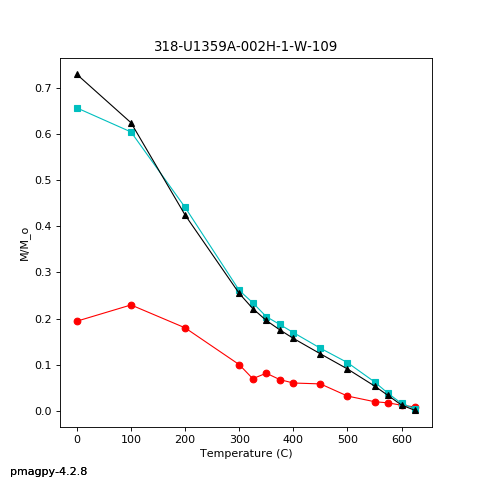

In [164]:
Image(filename='lowrie__318-U1359A-002H-1-W-109_.png')

# lowrie_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#lowrie_magic)

In [165]:
!lowrie_magic.py -f data_files/lowrie_magic/measurements.txt -fmt png -sav

/Users/nebula/Python/PmagPy/data_files/lowrie_magic/measurements.txt
318-U1361A-007H-1-W-100a
1  saved in  lowrie__318-U1361A-007H-1-W-100a_.png
318-U1361A-007H-3-W-135a
1  saved in  lowrie__318-U1361A-007H-3-W-135a_.png
318-U1361A-007H-4-W-42a
1  saved in  lowrie__318-U1361A-007H-4-W-42a_.png
318-U1361A-007H-7-W-20a
1  saved in  lowrie__318-U1361A-007H-7-W-20a_.png
318-U1361A-008H-1-W-73a
1  saved in  lowrie__318-U1361A-008H-1-W-73a_.png
318-U1361A-008H-3-W-102a
1  saved in  lowrie__318-U1361A-008H-3-W-102a_.png
318-U1361A-008H-4-W-78a
1  saved in  lowrie__318-U1361A-008H-4-W-78a_.png
318-U1361A-008H-5-W-67a
1  saved in  lowrie__318-U1361A-008H-5-W-67a_.png
318-U1361A-008H-6-W-83a
1  saved in  lowrie__318-U1361A-008H-6-W-83a_.png
318-U1361A-008H-7-W-28a
1  saved in  lowrie__318-U1361A-008H-7-W-28a_.png
318-U1361A-009H-1-W-94a
1  saved in  lowrie__318-U1361A-009H-1-W-94a_.png
318-U1361A-009H-2-W-77a
1  saved in  lowrie__318-U1361A-009H-2-W-77a_.png
318-U1361A-009H-3-W-63a
1  saved in  

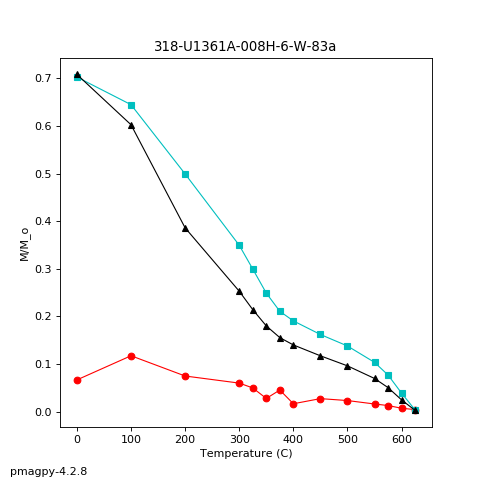

In [166]:
Image("lowrie__318-U1361A-008H-6-W-83a_.png")

## magic_select.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#magic_select)

In [3]:
!magic_select.py -f data_files/magic_select/specimens.txt \
    -key method_codes LP-PI-TRM has -F data_files/magic_select/AF_specimens.txt

-W- cartopy is not installed
    If you want to make maps, install using conda:
    conda install cartopy
-W- You haven't installed a module for plotting maps (cartopy or Basemap)
    Recommended: install cartopy.  With conda:
    conda install cartopy
    For more information, see http://earthref.org/PmagPy/Cookbook#getting_python
50  records written to file  ./data_files/magic_select/AF_specimens.txt


## mst_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#mst_magic)

In [170]:
!mst_magic.py -f data_files/convert_2_magic/MsT_magic/curie_example.dat -spn specimen_name

No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site name found for:  specimen_name specimen_name
no location name for:  specimen_name
No site na

-I- Using online data model
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 35 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 35 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file


## mk_redo.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#mk_redo)

In [171]:
!mk_redo.py -WD data_files/mk_redo

Redo files saved to:  /Users/nebula/Python/PmagPy/data_files/mk_redo/zeq_redo /Users/nebula/Python/PmagPy/data_files/mk_redo/thellier_redo


In [172]:
!cat data_files/mk_redo/thellier_redo | head

sr01a1 573 823 
sr01a2 573 848 
sr01c2 673 823 
sr01d1 373 823 
sr01i1 373 773 
sr03a1 373 673 
sr03b1 373 673 
sr03c1 423 673 
sr03e1 423 673 
sr09f1 373 573 


In [173]:
!cat data_files/mk_redo/zeq_redo | head

sr01a1 DE-BFL 473 823 A 
sr01a2 DE-BFL 473 848 A 
sr01c2 DE-BFL 473 823 A 
sr01d1 DE-BFL 373 798 A 
sr01e2 DE-BFL 0.01 0.18 A 
sr01f2 DE-BFL 423 923 A 
sr01g2 DE-BFL 0.01 0.16 A 
sr01i1 DE-BFL 473 823 A 
sr03a1 DE-BFL 473 823 A 
sr03b1 DE-BFL 673 823 A 


## orientation_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#orientation_magic)

In [174]:
try:
    os.remove('data_files/orientation_magic/samples.txt')
except FileNotFoundError:
    pass
!orientation_magic.py -WD data_files/orientation_magic -f orient_example.txt -gmt 13
!cat data_files/orientation_magic/samples.txt | head

Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -app, -ocn, -dcn, -BCN, -ncn, -mcd, -a, -DM
setting location name to ""
setting location name to ""
saving data...
24  records written to file  data_files/orientation_magic/samples.txt
2  records written to file  data_files/orientation_magic/sites.txt
Data saved in  data_files/orientation_magic/samples.txt  and  data_files/orientation_magic/sites.txt
tab 	samples
azimuth	azimuth_dec_correction	bed_dip	bed_dip_direction	citations	cooling_rate	cooling_rate_corr	cooling_rate_mcd	description	dip	geologic_classes	geologic_types	height	igsn	lat	lithologies	location	lon	method_codes	orientation_quality	sample	sample_alternatives	scientists	site	texture	timestamp
258.0		4	162.3	This study					-38.0					-78.25435		McMurdo	163.72913	SO-MAG		mc123a			mc123		2004:1:15:16:58
48.3	150.3	4	162.3	This study				Declination correction calculated from IGRF	-38.0					-78.25435		McMurdo	163.72913	SO-CMD-NORTH		mc123a			mc123		2004:1:15:16:58
35.8		4	162

## pca.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#pca)

In [175]:
!pca.py -dir L 1 10 -f data_files/pca/pca_example.txt

eba24a DE-BFL
0 0.00 339.9 57.9 9.2830e-05
1 2.50 325.7 49.1 7.5820e-05
2 5.00 321.3 45.9 6.2920e-05
3 10.00 314.8 41.7 5.2090e-05
4 15.00 310.3 38.7 4.4550e-05
5 20.00 305.0 37.0 3.9540e-05
6 30.00 303.9 34.7 3.2570e-05
7 40.00 303.0 32.3 2.5670e-05
8 50.00 303.6 32.4 2.2520e-05
9 60.00 299.8 30.8 1.9820e-05
10 70.00 292.5 31.0 1.3890e-05
11 80.00 297.0 25.6 1.2570e-05
12 90.00 299.3 11.3 0.5030e-05
eba24a DE-BFL 10    2.50  70.00    8.8   334.9    51.5


## pmd_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#pmd_magic)

In [176]:
!pmd_magic.py -f data_files/convert_2_magic/PMD_magic/PMD/ss0207a.pmd

-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 8 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 8 records written to measurements file


# plotxy.py

In [177]:
!plotxy.py -f data_files/plotXY/plotXY_example.txt -fmt png -sav

Figure saved as  plotXY.png


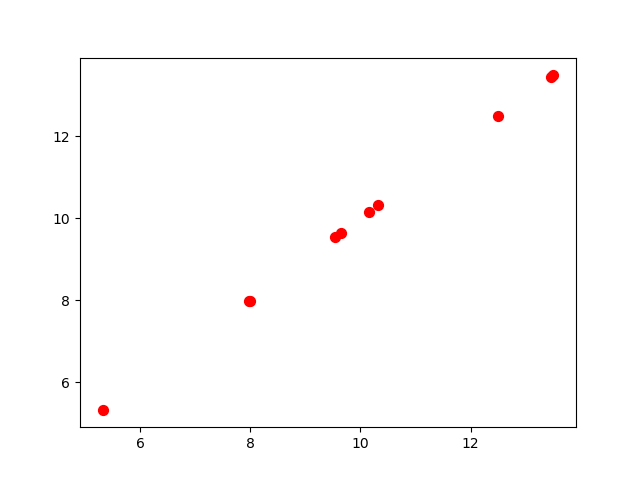

In [178]:
Image(filename='plotXY.png')

## plot_cdf.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#plot_cdf)

In [179]:
!plot_cdf.py -f data_files/plot_cdf/gaussian.out -fmt png -sav

1  saved in  CDF_.png


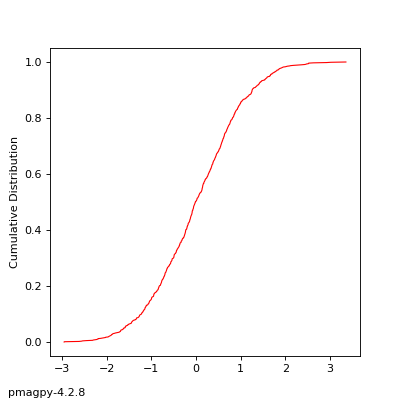

In [180]:
Image(filename='CDF_.png')

## plot_geomagia.py   
see [\[notebook version\]](http://pmagpy.github.io/PmagPy.html#plot_geomagia)


## plot_magmap.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#plot_magmap)

In [181]:
!plot_magmap.py -el B -fmt png -sav

Figure saved as:  geomagnetic_field_2016.0.png


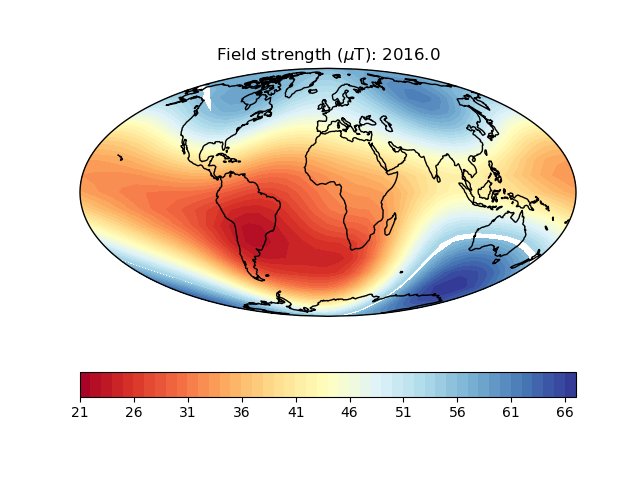

In [182]:
image = None
if cartopy_present:
    image = Image('geomagnetic_field_2016.0.png')
image

## plot_map_pts.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#plot_map_pts)

In [183]:
!plot_map_pts.py -f data_files/plot_map_pts/uniform.out -B -R \
    -prj ortho -eye 30 0 -etp -sym wo 10 -fmt png -sav

-W- plotting will require patience!
please wait to draw points
gridlines only supported for PlateCarree and Mercator plots currently
1  saved in  map_pts.png


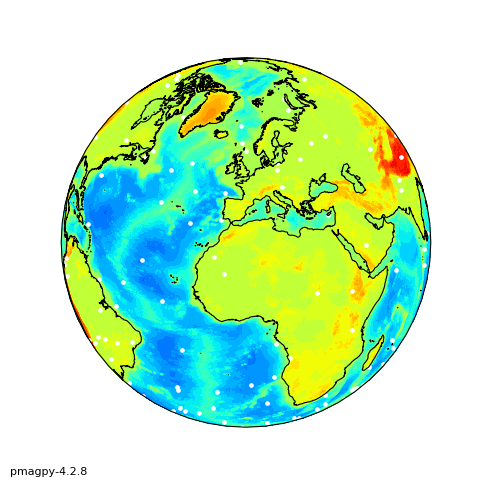

In [184]:
image = None
if cartopy_present:
    image = Image(filename='map_pts.png')
image

## plotdi_a.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#plotdi_a)

In [185]:
!plotdi_a.py -f data_files/plotdi_a/plotdi_a_example.dat -fmt png -sav

1  saved in  eq.png


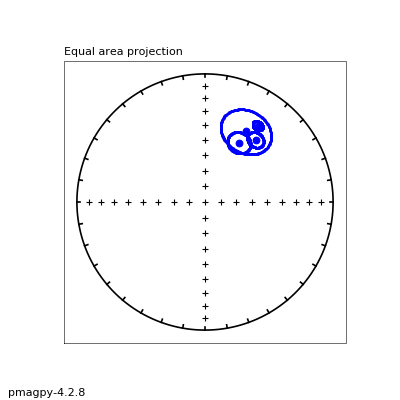

In [186]:
Image(filename='eq.png')

## pmag_results_extract.py

In [187]:
!pmag_results_extract.py -WD data_files/pmag_results_extract -f pmag_results.txt

data saved in:  /Users/nebula/Python/PmagPy/data_files/pmag_results_extract/Directions.txt /Users/nebula/Python/PmagPy/data_files/pmag_results_extract/Intensities.txt /Users/nebula/Python/PmagPy/data_files/pmag_results_extract/SiteNfo.txt


## polemap_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#polemap_magic)

In [188]:
!polemap_magic.py -WD data_files/polemap_magic -sav -fmt png

-I- Using online data model
gridlines only supported for PlateCarree and Mercator plots currently
1  saved in  Cismon Section_Monte Raparo Limestones_Algarve Bas_POLE_map_t.png


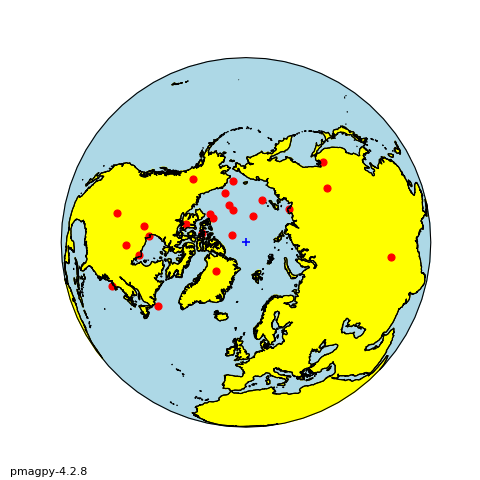

In [189]:
image = None
if cartopy_present:
    image = Image(filename="Cismon Section_Monte Raparo Limestones_Algarve Bas_POLE_map_t.png")
image

## pt_rot.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#pt_rot)

In [190]:
!awk '{print $1,$2}' data_files/pt_rot/pt_rot.input > data_files/pt_rot/lon_lat
!plot_map_pts.py -prj moll -f data_files/pt_rot/lon_lat -sym g^ 20 -R -B -eye 0 0 -fmt png -sav

please wait to draw points
gridlines only supported for PlateCarree and Mercator plots currently
1  saved in  map_pts.png


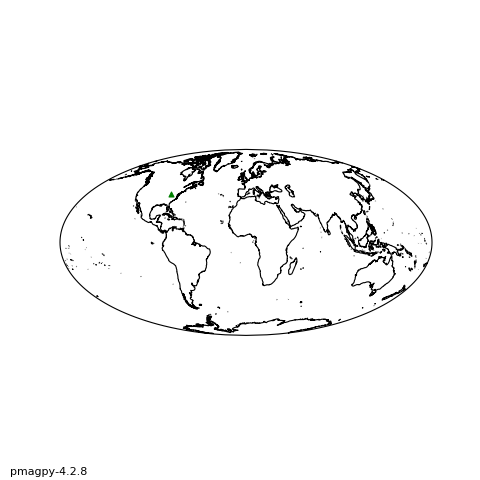

In [191]:
image
if cartopy_present:
    image = Image(filename='map_pts.png')

image

In [192]:
!cat data_files/pt_rot/pt_rot.input
!pt_rot.py -f data_files/pt_rot/pt_rot.input > data_files/pt_rot/pt_rot.out

-84.7 39.1 nam 80 saf


In [193]:
!plot_map_pts.py -prj moll -f data_files/pt_rot/pt_rot.out -sym ro 20 -R -B -eye 0 0 -fmt png -sav

please wait to draw points
gridlines only supported for PlateCarree and Mercator plots currently
1  saved in  map_pts.png


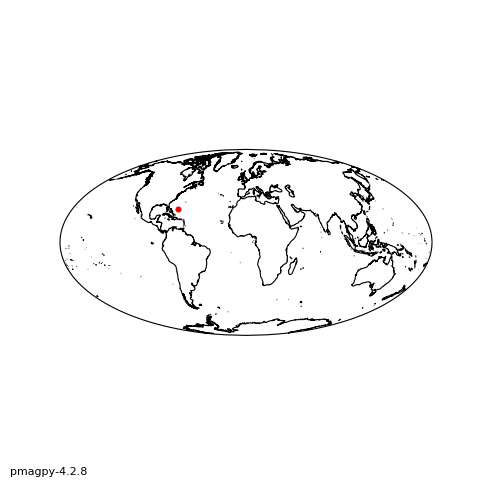

In [194]:
if cartopy_present:
    image = Image(filename='map_pts.png')
image

Something still weird about pt_rot.py (the -ff option). 

In [195]:
!pt_rot.py -ff data_files/pt_rot/nam_180-200.txt data_files/pt_rot/nam_panA.frp > data_files/pt_rot/pt_rot_panA.out


In [196]:
!plot_map_pts.py -f data_files/pt_rot/pt_rot_panA.out -prj ortho -eye 60 90 -sym ro 10 -B -R -fmt png -sav

please wait to draw points
gridlines only supported for PlateCarree and Mercator plots currently
1  saved in  map_pts.png


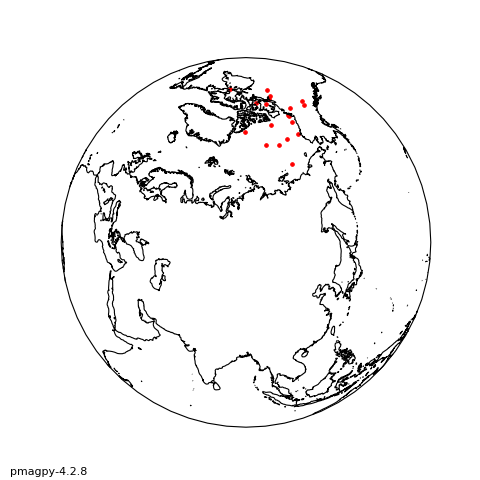

In [197]:
image = None
if cartopy_present:
    image = Image(filename='Map_pts.png')
image

## qqplot.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#pt_rot)

In [198]:
!qqplot.py -f data_files/qqplot/gauss.out -fmt png -sav

1  saved in  qq.png


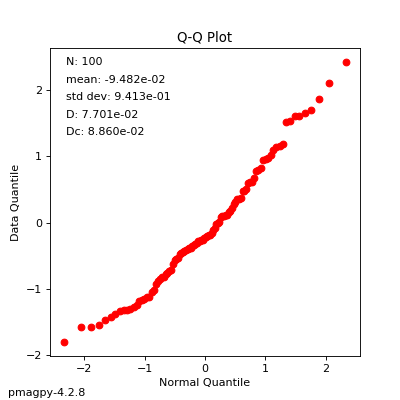

In [199]:
Image(filename='qq.png')

## quick_hyst.py

-I- Using online data model
['mc04c-1' 'mc113a1-1' 'mc117a2-1' 'mc120a2-1' 'mc129a1-1' 'mc164a2-1'
 'mc205a1-1' 'mc217a2-1']
working on t:  273
1  saved in  McMurdo_mc04c_mc04c_mc04c-1_hyst.png


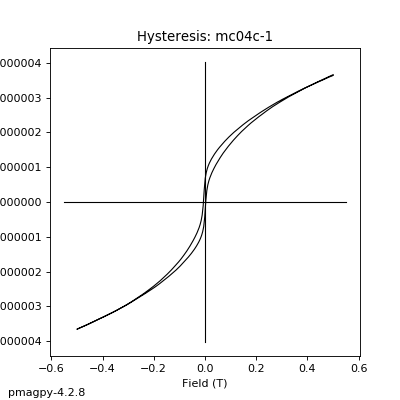

In [200]:
!quick_hyst.py -WD data_files/3_0/McMurdo -spc mc04c-1 -fmt png

Image("McMurdo_mc04c_mc04c_mc04c-1_hyst.png")

## revtest.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#revtest)

In [203]:
!revtest.py -f data_files/revtest/revtest_example.txt -fmt png -sav

doing first mode, be patient
doing second mode, be patient
1  saved in  REV_X.png
2  saved in  REV_Y.png
3  saved in  REV_Z.png


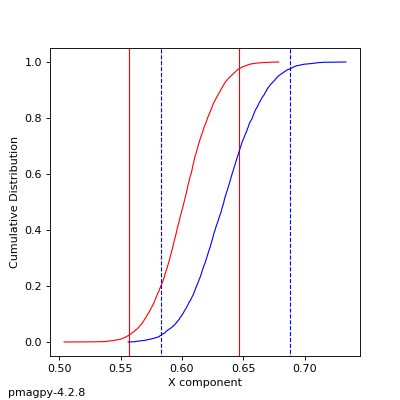

In [204]:
Image(filename='REV_X.png')

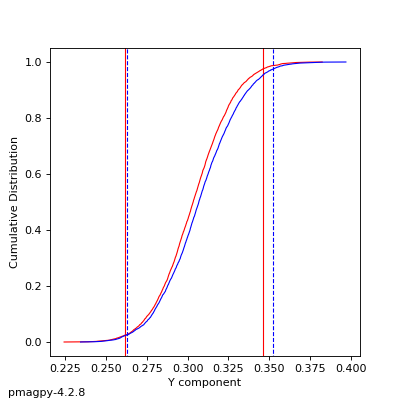

In [205]:
Image(filename='REV_Y.png')

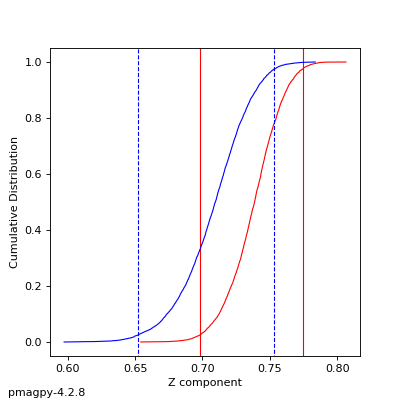

In [206]:
Image(filename='REV_Z.png')

## revtest_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#revtest_magic)

In [207]:
!revtest_magic.py -f data_files/revtest_magic/sites.txt -fmt png -sav -DM 3 -exc

doing first mode, be patient
doing second mode, be patient
1  saved in  REV_X.png
2  saved in  REV_Y.png
3  saved in  REV_Z.png


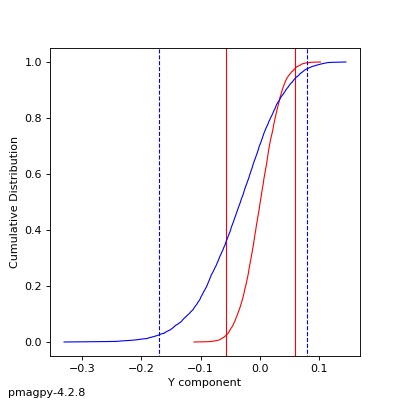

In [208]:
Image("Rev_Y.png")

## s_eigs.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#s_eigs)

In [211]:
!s_eigs.py -f data_files/s_eigs/s_eigs_example.dat

0.33127186 239.53  44.70 0.33351338 126.62  21.47 0.33521473  19.03  37.54
0.33177859 281.12   6.18 0.33218277 169.79  73.43 0.33603862  12.82  15.32
0.33046979 283.57  27.30 0.33328307 118.37  61.91 0.33624712  16.75   6.13
0.33123776 261.36  12.07 0.33377582 141.40  66.82 0.33498645 355.70  19.48
0.33085680 255.71   7.13 0.33379164 130.85  77.65 0.33535156 346.97  10.03
0.33175930 268.51  26.79 0.33405024 169.66  16.95 0.33419049  51.04  57.53
0.33194992 261.59  20.68 0.33313262  92.18  68.99 0.33491743 352.93   3.54
0.33157593 281.42  21.32 0.33312121 117.04  67.94 0.33530283  13.54   5.41


## s_geo.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#s_geo)

In [212]:
!s_geo.py -f data_files/s_geo/s_geo_example.dat

0.33412680 0.33282733 0.33304587 -0.00015289 0.00124843 0.00135721 
0.33556300 0.33198264 0.33245432 0.00087259 0.00024141 0.00096166 
0.33584908 0.33140627 0.33274469 0.00131845 0.00118816 0.00002986 
0.33479756 0.33142531 0.33377719 -0.00047493 0.00049539 0.00044303 
0.33505613 0.33114848 0.33379540 -0.00101375 0.00028536 0.00034852 
0.33406156 0.33226916 0.33366925 -0.00002267 0.00098548 0.00005553 
0.33486596 0.33216032 0.33297369 -0.00035492 0.00039254 0.00015403 
0.33510646 0.33196402 0.33292958 0.00075965 0.00057242 0.00010112 


## s_hext.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#s_hext)

In [213]:
!s_geo.py -f data_files/s_geo/s_geo_example.dat | s_hext.py

F =  5.79 F12 =  3.55 F23 =  3.66
N =  8  sigma =  0.000641809950
0.33505     5.3    14.7    25.5   124.5    61.7    13.3   268.8    23.6
0.33334   124.5    61.7    25.1   268.8    23.6    25.5     5.3    14.7
0.33161   268.8    23.6    13.3     5.3    14.7    25.1   124.5    61.7


## sio_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#sio_magic)

See [irmaq_magic.py](#irmaq_magic.py)

## s_tilt.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#s_tilt)

In [214]:
!s_tilt.py -f data_files/s_tilt/s_tilt_example.dat

0.33455709 0.33192658 0.33351630 -0.00043562 0.00092779 0.00105006 
0.33585501 0.33191565 0.33222935 0.00055960 -0.00005316 0.00064732 
0.33586669 0.33084923 0.33328408 0.00142266 0.00013234 0.00009203 
0.33488664 0.33138493 0.33372843 -0.00056597 -0.00039085 0.00004873 
0.33506602 0.33127019 0.33366373 -0.00105193 -0.00057257 -0.00029959 
0.33407688 0.33177567 0.33414748 0.00007007 0.00018447 0.00005073 
0.33483925 0.33197853 0.33318222 -0.00028447 0.00003518 -0.00029262 
0.33513144 0.33175036 0.33311823 0.00077914 -0.00006402 0.00004612 


## s_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#s_magic)

In [215]:
!s_magic.py -WD data_files/convert_2_magic/s_magic -f s_magic_example.dat 

8  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/s_magic/specimens.txt
data saved in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/s_magic/specimens.txt
-I- Using online data model
-I- Creating new samples table with data from specimens table
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/s_magic/samples.txt
-I- 8 records written to samples file
-I- Creating new sites table with data from samples table
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/s_magic/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/s_magic/samples.txt
-I- 8 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/s_magic/sites.txt
-I- 1 records written to sites file


## scalc.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#scalc)

In [216]:
!scalc.py -f data_files/scalc/scalc_example.txt

100    21.8    180.0 


In [217]:
!scalc.py < data_files/scalc/scalc_example.txt

100    21.8    180.0 


In [218]:
!scalc.py -f data_files/scalc/scalc_example.txt -v

89    15.2     32.3 


In [219]:
!scalc.py -f data_files/scalc/scalc_example.txt -v -b

89    15.2    13.5     16.9    32.3 


## scalc_magic.py 
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#scalc_magic)

In [220]:
!scalc_magic.py -f data_files/scalc_magic/sites.txt -c 30

13    17.9     30.0 


## site_edit.py 

This program requires user interaction and can only be used on the command line. 

## specimens_results_magic.py

This program has been superceded by Pmag GUI and is not maintained.  

## stats.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#stats)

In [222]:
!stats.py -f data_files/gaussian/gauss.out

100 9.94986999 994.9869990000003 0.9581673609207783 9.629948550923512


## strip_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#strip_magic)

In [225]:
!strip_magic.py -f data_files/strip_magic/sites_with_vgps.txt -x age -y lat -fmt png -sav -DM 3

1  saved in  strat.png


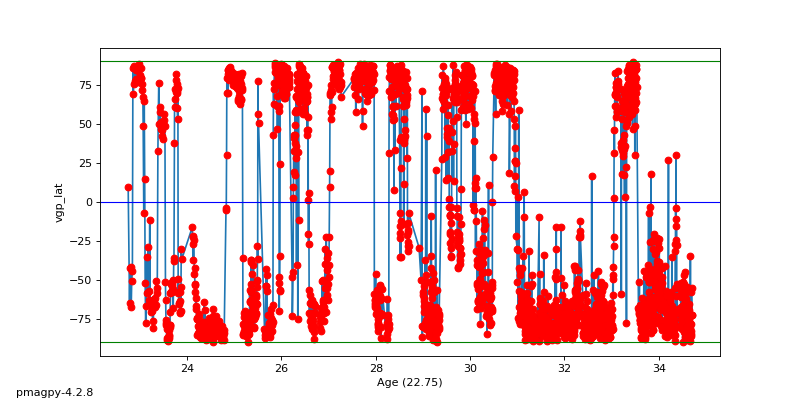

In [226]:
Image(filename='strat.png')

## sundec.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#sundec)

In [227]:
!sundec.py -f data_files/sundec/sundec_example.dat

  154.2


## thellier_magic.py 
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#thellier_magic)

This program is no longer maintained - try Thellier GUI instead.  

## thellier_magic_redo.py

The function of this program has been incorporated into Thellier GUI so you should use that instead.  

## tk03.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#tk03)

In [228]:
!tk03.py -lat 30 > data_files/tk03/tk03.out
!eqarea.py -f data_files/tk03/tk03.out -fmt png -sav

1  saved in  tk03_eq.png


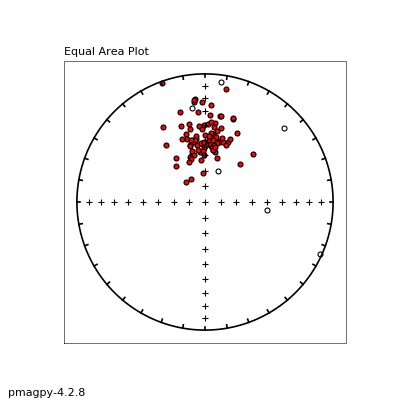

In [229]:
Image(filename='tk03_eq.png')

## trmaq_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#trmaq_magic)

In [230]:
!trmaq_magic.py -ft data_files/3_0/McMurdo/specimens.txt \
    -f data_files/3_0/McMurdo/measurements.txt -sav -fmt png

mc01a 1 of  1046 Best =  13.5
skipping specimen -  no trm acquisition data  mc01a
mc01b 2 of  1046 Best =  13.9
skipping specimen -  no trm acquisition data  mc01b
skipping  mc01c  : no best 
mc01d 4 of  1046 Best =  18.7
skipping specimen -  no trm acquisition data  mc01d
skipping  mc01e  : no best 
skipping  mc01f  : no best 
mc01g 7 of  1046 Best =  20.1
skipping specimen -  no trm acquisition data  mc01g
skipping  mc01h  : no best 
skipping  mc02a  : no best 
skipping  mc02b  : no best 
skipping  mc02c  : no best 
skipping  mc02e  : no best 
mc02f 13 of  1046 Best =  16.7
skipping specimen -  no trm acquisition data  mc02f
skipping  mc02g  : no best 
skipping  mc02h  : no best 
skipping  mc03a  : no best 
skipping  mc03b  : no best 
skipping  mc03c  : no best 
skipping  mc03d  : no best 
skipping  mc03f  : no best 
skipping  mc03h  : no best 
skipping  mc04a  : no best 
skipping  mc04b  : no best 
skipping  mc04c-1  : no best 
skipping  mc04e  : no best 
skipping  mc04f  : no best 

skipping specimen -  no trm acquisition data  mc11c
skipping  mc11d  : no best 
mc11e 211 of  1046 Best =  30.3
skipping specimen -  no trm acquisition data  mc11e
skipping  mc11f  : no best 
skipping  mc11g  : no best 
mc11h 214 of  1046 Best =  22.799999999999997
skipping specimen -  no trm acquisition data  mc11h
mc120a1 215 of  1046 Best =  24.7
skipping specimen -  no trm acquisition data  mc120a1
skipping  mc120a2  : no best 
skipping  mc120a2-1  : no best 
mc120b1 218 of  1046 Best =  24.7
skipping specimen -  no trm acquisition data  mc120b1
mc120b2 219 of  1046 Best =  25.0
skipping specimen -  no trm acquisition data  mc120b2
mc120c1 220 of  1046 Best =  23.900000000000002
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 121
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 46
         Function evaluations: 90
Banc=  23.888891833665905
1  s

skipping specimen -  no trm acquisition data  mc136a2
skipping  mc136c1  : no best 
skipping  mc136d1  : no best 
skipping  mc136d2  : no best 
skipping  mc136e1  : no best 
skipping  mc136g1  : no best 
skipping  mc136h2  : no best 
skipping  mc136i1  : no best 
skipping  mc136i2  : no best 
skipping  mc137a1  : no best 
skipping  mc137d1  : no best 
skipping  mc137h1  : no best 
skipping  mc137j2  : no best 
skipping  mc137l1  : no best 
skipping  mc138a1  : no best 
skipping  mc138b1  : no best 
skipping  mc138d1  : no best 
skipping  mc138g1  : no best 
skipping  mc138h1  : no best 
mc139a1 377 of  1046 Best =  5.36
skipping specimen -  no trm acquisition data  mc139a1
skipping  mc139a2  : no best 
mc139c1 379 of  1046 Best =  19.8
skipping specimen -  no trm acquisition data  mc139c1
skipping  mc139d1  : no best 
skipping  mc139e1  : no best 
skipping  mc139h1  : no best 
skipping  mc139j2  : no best 
mc13a 384 of  1046 Best =  28.5
skipping specimen -  no trm acquisition data  mc

skipping specimen -  no trm acquisition data  mc15h
mc160a1 545 of  1046 Best =  20.9
skipping specimen -  no trm acquisition data  mc160a1
skipping  mc160a2  : no best 
skipping  mc160b1  : no best 
skipping  mc160c1  : no best 
mc160e1 549 of  1046 Best =  22.099999999999998
skipping specimen -  no trm acquisition data  mc160e1
skipping  mc160e2  : no best 
mc160f2 551 of  1046 Best =  22.7
skipping specimen -  no trm acquisition data  mc160f2
skipping  mc160h2  : no best 
skipping  mc160j1  : no best 
skipping  mc160j2  : no best 
skipping  mc161a1  : no best 
mc161b1 556 of  1046 Best =  5.800000000000001
skipping specimen -  no trm acquisition data  mc161b1
skipping  mc161e1  : no best 
skipping  mc161f1  : no best 
mc161g1 559 of  1046 Best =  4.1
skipping specimen -  no trm acquisition data  mc161g1
skipping  mc161j1  : no best 
skipping  mc161k1  : no best 
mc162b1 562 of  1046 Best =  7.29
skipping specimen -  no trm acquisition data  mc162b1
skipping  mc162b2  : no best 
mc16

skipping specimen -  no trm acquisition data  mc211b1
skipping  mc211b2  : no best 
mc211e1 725 of  1046 Best =  75.2
skipping specimen -  no trm acquisition data  mc211e1
skipping  mc211e2  : no best 
mc211g1 727 of  1046 Best =  73.6
skipping specimen -  no trm acquisition data  mc211g1
skipping  mc211g2  : no best 
mc211h1 729 of  1046 Best =  89.5
skipping specimen -  no trm acquisition data  mc211h1
mc211i1 730 of  1046 Best =  72.3
skipping specimen -  no trm acquisition data  mc211i1
skipping  mc212a1  : no best 
skipping  mc212b1  : no best 
skipping  mc212b2  : no best 
skipping  mc212c2  : no best 
skipping  mc212d2  : no best 
skipping  mc212g2  : no best 
skipping  mc213b1  : no best 
skipping  mc213e2  : no best 
skipping  mc213f2  : no best 
skipping  mc213g2  : no best 
skipping  mc213h2  : no best 
skipping  mc213i2  : no best 
skipping  mc214a2  : no best 
mc214b1 744 of  1046 Best =  48.8
skipping specimen -  no trm acquisition data  mc214b1
skipping  mc214b2  : no be

skipping specimen -  no trm acquisition data  mc228b1
skipping  mc228b2  : no best 
mc228d1 876 of  1046 Best =  13.200000000000001
skipping specimen -  no trm acquisition data  mc228d1
skipping  mc228d2  : no best 
mc228e1 878 of  1046 Best =  12.3
skipping specimen -  no trm acquisition data  mc228e1
skipping  mc228e2  : no best 
mc228g1 880 of  1046 Best =  17.3
skipping specimen -  no trm acquisition data  mc228g1
skipping  mc228g2  : no best 
skipping  mc229a2  : no best 
skipping  mc229b1  : no best 
skipping  mc229b2  : no best 
skipping  mc229e2  : no best 
mc229g1 886 of  1046 Best =  34.199999999999996
skipping specimen -  no trm acquisition data  mc229g1
skipping  mc229g2  : no best 
mc229h1 888 of  1046 Best =  26.8
skipping specimen -  no trm acquisition data  mc229h1
skipping  mc229h2  : no best 
mc229i1 890 of  1046 Best =  30.4
skipping specimen -  no trm acquisition data  mc229i1
mc229k1 891 of  1046 Best =  32.7
skipping specimen -  no trm acquisition data  mc229k1
mc

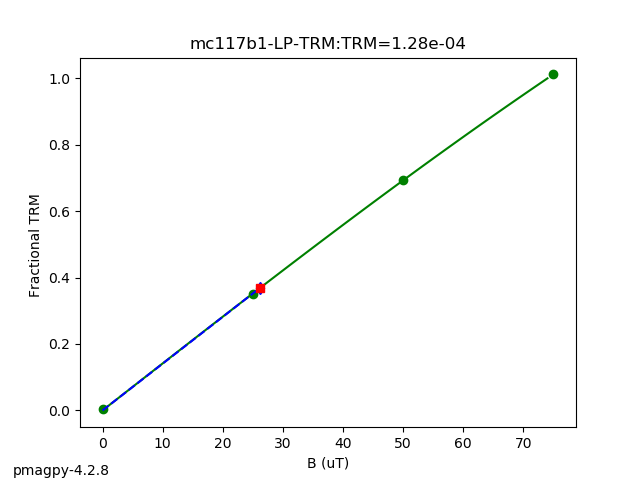

In [231]:
Image("mc117b1_TRM.png")

## uniform.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#uniform)

In [234]:
!uniform.py -n 50

  229.1    29.6
  215.3   -10.4
  266.2     5.5
  298.2    25.5
  232.9   -43.4
  226.2   -63.1
  342.0    40.5
  357.9    64.2
  156.2   -66.8
  224.1     4.7
   33.0    -4.6
  111.5   -69.5
   91.9    38.9
  347.9    45.1
  300.3    35.9
  168.1   -17.7
  248.4   -26.0
  220.2   -58.0
   38.0     0.4
   68.2   -30.4
  355.1     9.0
   91.8   -28.4
   86.5   -14.6
   32.3   -21.2
   43.1    30.7
  293.1     6.6
   89.9     4.1
   56.5    -6.2
    3.4    18.7
  210.4   -34.4
  181.6   -40.9
   32.7   -20.1
   92.3   -47.4
  204.7    55.8
  327.1    21.0
    9.1   -35.9
   86.2    13.5
  271.4    60.7
  285.5    -2.8
   58.2   -53.5
  164.3   -18.4
   44.9   -29.9
  229.4   -66.6
  182.8    78.6
   77.6   -33.9
  107.5    20.8
  332.7    49.9
  223.6   -30.7
  182.7    34.7
  245.3   -35.1


In [235]:
!uniform.py -n 50 > data_files/uniform/uniform.out
!eqarea.py -f data_files/uniform/uniform.out -fmt png -sav

1  saved in  uniform_eq.png


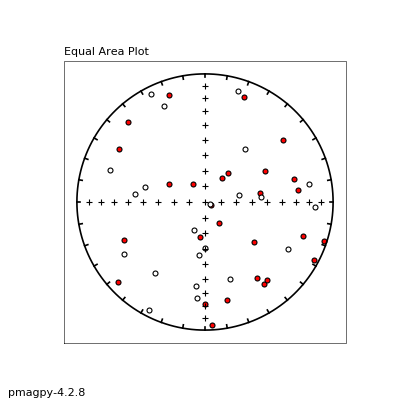

In [236]:
Image(filename='uniform_eq.png')

## update_measurements.txt 

This program has been superceded by Pmag GUI, so you should use that.

## upload_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#upload_magic)

program has been superceded by Pmag GUI, so you should use that.

## utrecht_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#utrecht_magic)

In [237]:
!utrecht_magic.py -f data_files/convert_2_magic/UTRECHT_magic/Utrecht_Example.af

-I- Using online data model
-I- Using online data model
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 350 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/specimens.txt
-I- 25 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/samples.txt
-I- 3 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/sites.txt
-I- 3 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 350 records written to measurements file


## vdm_b.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#vdm_b)

In [238]:
!vdm_b.py -f data_files/vdm_b/vdm_b_example.dat

 3.300e-05


In [239]:
!cat data_files/b_vdm/b_vdm_example.dat

33 22


## vector_mean.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#vector_mean)

In [240]:
!vector_mean.py -f data_files/vector_mean/vector_mean_example.dat

    1.3    49.6    2.289e+06 100


## vgp_di.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#vgp_di)

In [241]:
!vgp_di.py -f data_files/vgp_di/vgp_di_example.dat

  335.6    62.9


## vgpmap_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#vgpmap_magic)

In [242]:
!vgpmap_magic.py -WD data_files/3_0/McMurdo -f sites.txt -crd g -prj ortho -eye 60 0  -sym ko 10 -fmt png -S -sav

-I- Using online data model
gridlines only supported for PlateCarree and Mercator plots currently
1  saved in  McMurdo_VGP_map.png


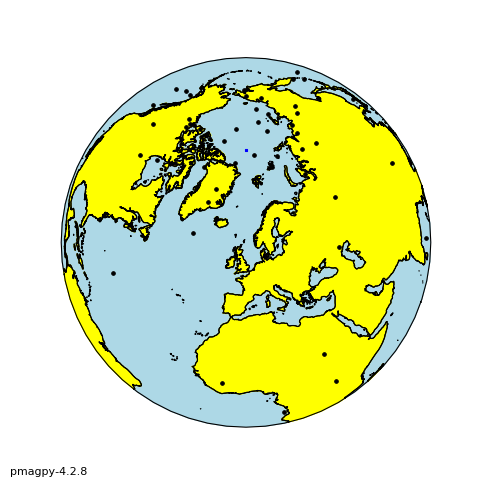

In [243]:
image = None
if cartopy_present:
    image = Image("McMurdo_VGP_map.png")
image

## watsons_f.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#watsons_f)

In [246]:
!watsons_f.py -f data_files/watsons_f/watsons_f_example_file1.dat \
-f2 data_files/watsons_f/watsons_f_example_file2.dat

   5.23    3.26


## watsons_v.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#watsons_v)

In [247]:
!watsons_v.py -f data_files/watsons_f/watsons_f_example_file1.dat \
-f2 data_files/watsons_f/watsons_f_example_file2.dat -fmt png -sav

Watson's V,  Vcrit: 
         10.5        6.4
1  saved in  watsons_v_watsons_f_example_file1_watsons_f_example_file2.png


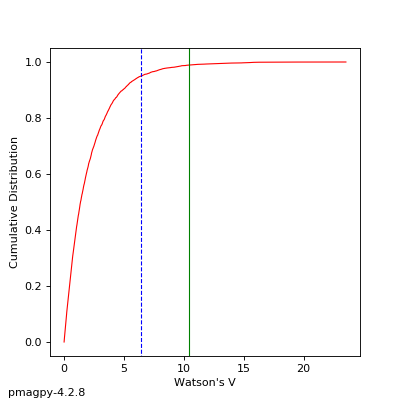

In [248]:
Image(filename="watsons_v_watsons_f_example_file1_watsons_f_example_file2.png")

## zeq.py 
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#zeq)

This program requires interaction and can only be run from the command line. 

## zeq_magic.py
[\[notebook version\]](http://pmagpy.github.io/PmagPy.html#zeq_magic)

##### Note: This program is no longer maintained.  It has been superceded by demag_gui.py

-I- Using online data model
mc01a 1 out of  1038
1  saved in  mc01a_eqarea.png
2  saved in  mc01a_zijd.png
3  saved in  mc01a_demag.png


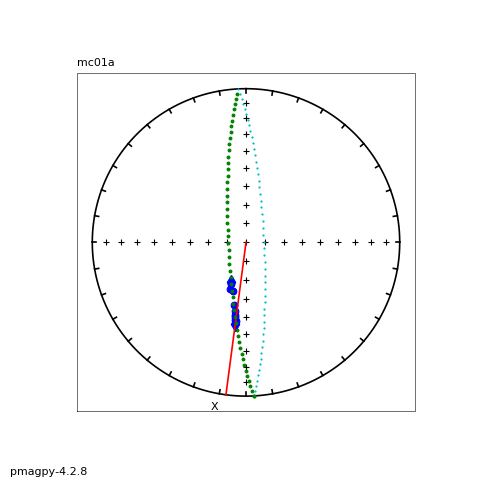

In [249]:
!zeq_magic.py -WD data_files/3_0/McMurdo -spc mc01a -fmt png
Image('mc01a_eqarea.png')

# cleanup the directory

In [258]:
import os
import glob
import shutil


glob_list = ['data_files/irmaq_magic/*.magic', '*.magic', '*.png', '*.jpg',
            'data_files/convert_2_magic/mini_magic/s*.txt', 'data_files/convert_2_magic/s_magic/*.txt',
            'data_files/irmaq_magic/coil*.txt', 'rmag_*.txt', 'data_files/orientation_magic/s*.txt',
            'data_files/mk_redo/*redo*', 'data_files/nrm_specimens_magic/s*.txt', 'data_files/irmaq_magic/s*.txt',
            'data_files/download_magic/pmag_s*.txt', 'data_files/convert_2_magic/tdt_magic/*.txt']
for pattern in glob_list:
    for fname in glob.glob(pattern):
        os.remove(fname)
    
    
files_to_remove = ["data_files/irmaq_magic/magic_measurements.txt",
                  "data_files/download_magic/er_ages.txt", "data_files/download_magic/er_citations.txt",
                  "data_files/azdip_magic/er_samples.txt", "data_files/azdip_magic/samples.txt",
                  "data_files/convert_2_magic/mini_magic/locations.txt", 
                  "data_files/convert_2_magic/mini_magic/measurements.txt", "measurements.txt", 'specimens.txt',
                  'sites.txt', 'locations.txt', 'stored.json', 'data_files/nrm_specimens_magic/criteria.txt',
                  'data_files/download_magic/er_locations.txt', 'data_files/download_magic/pmag_results.txt',
                  'data_files/nrm_specimens_magic/measurements.txt', 'data_files/nrm_specimens_magic/locations.txt',
                  'data_files/nrm_specimens_magic/contribution.txt', 'data_files/nrm_specimens_magic/ages.txt', 
                  'data_files/irmaq_magic/locations.txt', 'data_files/download_magic/specimens.txt', 
                  'data_files/download_magic/samples.txt', 'data_files/download_magic/locations.txt', 
                  'data_files/download_magic/contribution.txt', 'data_files/download_magic/criteria.txt',
                  'data_files/download_magic/ages.txt', 'data_files/download_magic/measurements.txt', 
                  'data_files/convert_2_magic/tdt_magic/custom.out', 'custom.txt', 
                  'data_files/convert_2_magic/huji_magic/specimens.txt', 
                  'data_files/convert_2_magic/huji_magic/locations.txt', 'data_files/aarm_magic/measurements.txt']
for fname in files_to_remove:
    try:
        os.remove(fname)
    except FileNotFoundError:
        pass
for dtype in ['specimens.txt', 'samples.txt', 'sites.txt', 'locations.txt']:
    try:
        os.remove(dtype)
    except FileNotFoundError:
        pass
    for fname in os.listdir():
        if fname.endswith(dtype):
            os.remove(fname)
            
        